Finpro

# Business Understanding

## Context

Olist adalah platform e-commerce asal Brasil yang berperan sebagai mitra operasional bagi seller dalam mengelola penjualan dan pengiriman produk di berbagai marketplace. Dataset yang digunakan dalam proyek ini mencakup sekitar 100.000 pesanan pada periode 2016–2018 dan berisi informasi lengkap terkait waktu pemesanan, estimasi pengiriman, waktu pengiriman aktual, serta lokasi seller dan customer.

Pada periode tersebut, estimasi waktu pengiriman yang ditampilkan kepada pelanggan bersifat statis dan kemungkinan besar ditentukan berdasarkan aturan sederhana atau data historis, seperti zona geografis dan SLA tertentu. Pendekatan ini belum sepenuhnya mempertimbangkan variasi karakteristik pesanan dan kondisi operasional aktual. Oleh karena itu, terdapat peluang untuk membangun estimasi waktu pengiriman yang lebih akurat dan adaptif dengan memanfaatkan pendekatan berbasis machine learning.

## Problem Statement

Berdasarkan data, terlihat bahwa waktu pengiriman pesanan memiliki variasi yang signifikan antar pesanan (± 12 hari), dipengaruhi oleh faktor seperti jarak geografis, jumlah item, dan waktu pemesanan. Variasi ini membuat estimasi pengiriman yang bersifat statis menjadi kurang akurat dan berpotensi menurunkan kepuasan pelanggan. 

Proyek ini bertujuan untuk **mengevaluasi estimasi waktu pengiriman yang telah digunakan Olist pada periode 2016–2018 dan membangun versi estimasi baru berbasis machine learning yang lebih adaptif terhadap karakteristik pesanan**

Dalam e-commerce, permasalahan utama bukan hanya keterlambatan pengiriman, tetapi ketidaksesuaian antara estimasi dan realisasi waktu pengiriman. Estimasi yang terlalu optimistis dapat menimbulkan kekecewaan pelanggan, meningkatkan komplain, serta memicu ulasan negatif. Sebaliknya, estimasi yang terlalu konservatif dapat menurunkan minat beli dan tingkat konversi.

Oleh karena itu, meningkatkan akurasi estimasi waktu pengiriman memiliki dampak bisnis yang signifikan, bahkan tanpa mengubah performa logistik secara langsung. Dengan estimasi yang lebih akurat, platform dapat mengelola ekspektasi pelanggan dengan lebih baik, mengurangi jumlah keluhan, dan meningkatkan kepercayaan terhadap layanan.

## Goals

Tujuan dari proyek ini adalah untuk mengevaluasi dan meningkatkan akurasi estimasi waktu pengiriman pesanan Olist dengan menggunakan pendekatan machine learning. Secara khusus, tujuan proyek ini adalah:

1. Mengevaluasi akurasi estimasi waktu pengiriman yang ada dengan membandingkannya terhadap waktu pengiriman aktual.

2. Membangun model machine learning berbasis regresi untuk memprediksi total waktu yang diperlukan untuk pengiriman pesanan menggunakan data yang tersedia saat pemesanan dilakukan.

3. Membandingkan hasil prediksi model dengan estimasi lama untuk mengetahui apakah pendekatan machine learning dapat memberikan estimasi yang lebih akurat.

4. Mengidentifikasi faktor-faktor utama yang memengaruhi waktu pengiriman pesanan sebagai insight pendukung pengambilan keputusan.

## Analytic Approach

Proyek ini dimulai dengan proses pembersihan dan persiapan data untuk memastikan kualitas data yang digunakan. Data diselaraskan pada tingkat pesanan, nilai yang hilang pada waktu pengiriman aktual dihapus, dan target dibentuk sebagai total waktu pengiriman pesanan dalam satuan hari. Selanjutnya, dilakukan pembuatan fitur-fitur utama seperti jarak antara seller dan customer, jumlah item dalam pesanan, serta fitur waktu pemesanan.

Setelah itu, estimasi waktu pengiriman yang ada dievaluasi sebagai baseline. Model machine learning berbasis regresi kemudian dibangun menggunakan data yang tersedia saat pemesanan untuk memprediksi waktu pengiriman pesanan. Performa model dibandingkan dengan estimasi lama untuk menilai apakah pendekatan berbasis machine learning dapat menghasilkan estimasi yang lebih akurat.

## Limitation
Proyek ini menggunakan data historis Olist periode 2016–2018, sehingga hasil analisis dan model yang dibangun merefleksikan kondisi operasional pada periode tersebut. Model tidak mempertimbangkan faktor eksternal yang tidak tersedia dalam dataset, seperti kondisi cuaca, gangguan operasional kurir, hari libur nasional, atau perubahan kebijakan logistik yang terjadi setelah periode data berakhir.

Selain itu, diasumsikan bahwa seluruh informasi yang digunakan sebagai fitur sudah tersedia pada saat pemesanan dilakukan. Estimasi waktu pengiriman yang ada dalam dataset digunakan sebagai baseline untuk evaluasi, bukan sebagai target pemodelan. Hasil prediksi model ditujukan sebagai alat bantu pengambilan keputusan dan tidak dimaksudkan sebagai estimasi yang sepenuhnya akurat untuk setiap kasus individual.

## Metric Evaluation

Karena permasalahan dalam proyek ini merupakan masalah regresi, evaluasi model difokuskan pada seberapa dekat hasil prediksi waktu pengiriman dengan nilai aktual. **Mean Absolute Error (MAE**) digunakan sebagai metrik utama karena mudah diinterpretasikan secara bisnis, yaitu menunjukkan rata-rata selisih (dalam hari) antara estimasi dan waktu pengiriman sebenarnya. **Root Mean Squared Error (RMSE)** digunakan sebagai metrik pendukung untuk memberikan penalti yang lebih besar pada kesalahan prediksi yang ekstrem.

Dalam konteks bisnis, kesalahan **underprediction (model memprediksi waktu pengiriman lebih cepat dari kenyataan) memiliki dampak yang lebih besar dibandingkan overprediction**, karena dapat meningkatkan ketidakpuasan pelanggan akibat ekspektasi yang tidak terpenuhi. Oleh karena itu, selain nilai MAE dan RMSE, analisis juga memperhatikan distribusi error prediksi untuk memastikan model tidak terlalu sering menghasilkan estimasi yang terlalu optimistis dibandingkan dengan estimasi lama.

# Data Understanding

(Dataset source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download&select=olist_customers_dataset.csv)

Note : 
- Setiap baris data merepresentasikan informasi order/pembelian yang unik

### Attribute Information

#### Customer Information

| Attribute                | Data Type          | Description                                                                          |
| ------------------------ | ------------------ | ------------------------------------------------------------------------------------ |
| customer_id              | Text               | Unique identifier for a customer record **per order**                                |
| customer_unique_id       | Text               | Persistent identifier representing the **same real customer across multiple orders** |
| customer_zip_code_prefix | Integer (5 digits) | First five digits of the customer ZIP code (CEP prefix)                              |
| customer_city            | Text               | City where the customer lives / delivery city                                        |
| customer_state           | Text (2 chars)     | Customer state (Brazilian state code, e.g. SP, RJ)                                   |

#### Geolocation Information

| Attribute                   | Data Type          | Description                                            |
| --------------------------- | ------------------ | ------------------------------------------------------ |
| geolocation_zip_code_prefix | Integer (5 digits) | ZIP code prefix linked to geographic coordinates       |
| geolocation_lat             | Float              | Latitude coordinate for the ZIP code                   |
| geolocation_lng             | Float              | Longitude coordinate for the ZIP code                  |
| geolocation_city            | Text               | City name linked to the ZIP code from geolocation data |
| geolocation_state           | Text (2 chars)     | State linked to the ZIP code from geolocation data     |

#### Order Information

| Attribute                     | Data Type | Description                                                     |
| ----------------------------- | --------- | --------------------------------------------------------------- |
| order_id                      | Text      | Unique identifier for an order                                  |
| order_status                  | Text      | Current status of the order (e.g. delivered, shipped, canceled) |
| order_purchase_timestamp      | Datetime  | Timestamp when the order was placed                             |
| order_approved_at             | Datetime  | Timestamp when the payment was approved                         |
| order_delivered_carrier_date  | Datetime  | Date when order was handed to the logistics carrier             |
| order_delivered_customer_date | Datetime  | Date when order was delivered to the customer                   |
| order_estimated_delivery_date | Datetime  | Estimated delivery date provided at purchase                    |

#### Order Item Information

| Attribute           | Data Type | Description                                               |
| ------------------- | --------- | --------------------------------------------------------- |
| order_item_id       | Integer   | Sequential number identifying items within the same order |
| product_id          | Text      | Unique identifier for a product                           |
| seller_id           | Text      | Unique identifier for the seller                          |
| shipping_limit_date | Datetime  | Seller shipping deadline for the order item               |
| price               | Float     | Price of the product item                                 |
| freight_value       | Float     | Shipping cost charged to the customer                     |

#### Payment Information

| Attribute            | Data Type | Description                                         |
| -------------------- | --------- | --------------------------------------------------- |
| payment_sequential   | Integer   | Payment sequence number for the same order          |
| payment_type         | Text      | Payment method (credit_card, boleto, voucher, etc.) |
| payment_installments | Integer   | Number of installments chosen by the customer       |
| payment_value        | Float     | Total amount paid in this payment transaction       |

#### Review Information

| Attribute               | Data Type     | Description                                 |
| ----------------------- | ------------- | ------------------------------------------- |
| review_id               | Text          | Unique identifier for a customer review     |
| review_score            | Integer (1–5) | Customer satisfaction score                 |
| review_comment_title    | Text          | Title of the review comment (if provided)   |
| review_comment_message  | Text          | Full review message written by the customer |
| review_creation_date    | Datetime      | Date when the review was created            |
| review_answer_timestamp | Datetime      | Date when the review received a response    |

#### Product Information

| Attribute                     | Data Type | Description                                     |
| ----------------------------- | --------- | ----------------------------------------------- |
| product_category_name         | Text      | Original product category name (Portuguese)     |
| product_category_name_english | Text      | Translated product category name (English)      |
| product_name_lenght           | Integer   | Number of characters in the product name        |
| product_description_lenght    | Integer   | Number of characters in the product description |
| product_photos_qty            | Integer   | Number of photos available for the product      |
| product_weight_g              | Float     | Product weight in grams                         |
| product_length_cm             | Float     | Product length in centimeters                   |
| product_height_cm             | Float     | Product height in centimeters                   |
| product_width_cm              | Float     | Product width in centimeters                    |

#### Seller Information

| Attribute              | Data Type          | Description                              |
| ---------------------- | ------------------ | ---------------------------------------- |
| seller_zip_code_prefix | Integer (5 digits) | First five digits of the seller ZIP code |
| seller_city            | Text               | City where the seller is located         |
| seller_state           | Text (2 chars)     | Seller state (Brazilian state code)      |


In [19]:
# Main Libraries
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Distribution & Correlation Check
from scipy.stats import shapiro
from scipy.stats import pointbiserialr

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline


# ML - Algorithm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error

from encoderss import FrequencyEncoder


In [20]:
# Load Datasaet
df = pd.read_csv('olist_combined_dataset.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


# Data Cleaning

## Membuat Target dan Fitur Tambahan

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [22]:
# Filter data yang statusnya sudah terkirim/delivered
df = df[df["order_status"] == "delivered"].copy()

In [23]:
# Merubah tipe ke datetime
date_cols = [
    "order_purchase_timestamp",
    "order_estimated_delivery_date",
    "order_delivered_customer_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col])


In [24]:
# Membuat target --> Waktu barang sampai dikurang waktu checkout pesanan (dalam hari)
df["order_days"] = (
    df["order_delivered_customer_date"]
    - df["order_purchase_timestamp"]
).dt.days

In [25]:
# Membuat fitur weekend
df['is_weekend'] = df['order_purchase_timestamp'].dt.dayofweek.isin([5, 6]).astype(int)

In [26]:
# Mengubah datatype weekend menjadi category
df['is_weekend'] = df['is_weekend'].astype('category')

In [27]:
# Mengorder data order sequential (hanya pembelian barang terakhir yang dimasukkan)
df = df.sort_values('order_item_id')

In [28]:
# Menghapus data order sequential (hanya pembelian barang terakhir yang dimasukkan)
df = df.drop_duplicates(subset='order_id', keep='last')

In [29]:
# Mengembalikan order
df = df.sort_values('order_purchase_timestamp')

In [30]:
# Membuat fitur same_state (order yang seller dan customer nya dalam state yang sama)
df['same_state'] = (df['customer_state'] == df['seller_state']).astype(int)

In [31]:
# Mengubah datatype same_state menjadi category
df['same_state'] = df['same_state'].astype('category')

In [32]:
# Membuat fitur distance_km --> read data latitiude & longitude pada dataset
geo = pd.read_csv('olist_geolocation_dataset.csv')

In [33]:
# Membuat fitur distance_km --> aggregasi dataset
geo_agg = (
    geo
    .groupby('geolocation_zip_code_prefix')
    .agg({
        'geolocation_lat': 'mean',
        'geolocation_lng': 'mean'
    })
    .reset_index()
)

In [34]:
# Membuat fitur distance_km --> merge data lokasi customer
df = df.merge(
    geo_agg,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

df = df.rename(columns={
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'
})

df = df.drop(columns=['geolocation_zip_code_prefix'])

In [35]:
# Membuat fitur distance_km --> merge data lokasi seller
df = df.merge(
    geo_agg,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

df = df.rename(columns={
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'
})

df = df.drop(columns=['geolocation_zip_code_prefix'])

In [36]:
# Check data lokasi sudah masuk ke dataset df
df[['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']].isna().sum()

customer_lat    264
customer_lng    264
seller_lat      215
seller_lng      215
dtype: int64

In [37]:
# Membuat fungsi perhitungan jarak
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    R = 6371  # Earth radius in km
    return R * c

In [38]:
# Memasukkan nilai jarak ke dataset
df['distance_km'] = haversine_distance(
    df['customer_lat'],
    df['customer_lng'],
    df['seller_lat'],
    df['seller_lng']
)

## Menghapus Fitur/Kolom yang tidak digunakan

In [39]:
unused_cols = [
    "review_id",
    "review_comment_title",
    "review_comment_message",
    "review_creation_date",
    "review_answer_timestamp",
    "customer_unique_id",
    "product_category_name",
    'order_id',
    'customer_id',
    'product_id',
    'seller_id',
    'shipping_limit_date',
    'payment_sequential',
    'payment_type',
    'payment_installments',
    'payment_value',
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'freight_value',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_status',
    'customer_lng',
    'customer_lat',
    'seller_lng',
    'seller_lat',
    'customer_zip_code_prefix',
    'customer_city',
    'seller_zip_code_prefix',
    'seller_city'
]

df = df.drop(columns=unused_cols)

In [40]:
# Mengecek data invalid pada distance_km
df['distance_km'].describe()

count    96000.000000
mean       600.756111
std        593.763769
min          0.000000
25%        186.345251
50%        433.862701
75%        798.548675
max       8677.911622
Name: distance_km, dtype: float64

In [41]:
# Mendefinisi dan check data invalid pada distance_km
invalid_distance = (df['distance_km'] < 0) | (df['distance_km'] > 5000)
df[invalid_distance]

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_state,order_item_id,price,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_state,order_days,is_weekend,same_state,distance_km
31455,2017-11-05 19:54:45,2017-12-04 21:04:22,2017-12-14,PA,1.0,121.90,5.0,1350.0,27.0,9.0,18.0,health_beauty,SP,29.0,1,0,5338.619521
34705,2017-11-23 18:13:30,2017-12-19 08:58:58,2018-01-04,PA,1.0,119.90,1.0,1900.0,27.0,9.0,18.0,health_beauty,SP,25.0,0,0,5338.619521
86694,2018-07-17 21:25:29,2018-08-14 04:04:40,2018-08-03,PR,1.0,67.99,5.0,4900.0,69.0,19.0,41.0,auto,SC,27.0,0,0,8677.911622


In [42]:
# Menghapus data jarak yang invalid
df = df[~invalid_distance]
df['distance_km'].describe()

count    95997.000000
mean       600.573262
std        592.806131
min          0.000000
25%        186.342095
50%        433.848972
75%        798.446998
max       4791.614270
Name: distance_km, dtype: float64

## Mengecek & Manipulasi Nilai Kosong

In [43]:
df.isna().sum().sort_values(ascending=False)
(df.isna().mean() * 100).sort_values(ascending=False)

product_category_name_english    1.429386
review_score                     0.669604
distance_km                      0.495465
product_height_cm                0.016585
product_weight_g                 0.016585
product_length_cm                0.016585
product_width_cm                 0.016585
order_days                       0.008292
order_delivered_customer_date    0.008292
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
customer_state                   0.000000
order_item_id                    0.000000
price                            0.000000
seller_state                     0.000000
is_weekend                       0.000000
same_state                       0.000000
dtype: float64

In [44]:
# Mendrop nilai kosong pada data yang ada nilai kosong
dropped = [
    'distance_km',
    'product_category_name_english',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'order_days'
]
df = df.dropna(subset=dropped)


In [45]:
# Check ulang nilai kosong
df.isna().sum().sort_values(ascending=False)

review_score                     637
order_purchase_timestamp           0
order_delivered_customer_date      0
customer_state                     0
order_estimated_delivery_date      0
order_item_id                      0
price                              0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english      0
seller_state                       0
order_days                         0
is_weekend                         0
same_state                         0
distance_km                        0
dtype: int64

## Mengidentifikasi dan hapus duplikat

In [46]:
# Check nilai duplikat
df.duplicated().sum()

np.int64(0)

In [47]:
# Verifikasi nilai duplikat
dup_rows = df[df.duplicated(keep=False)]
dup_rows.head(10)

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_state,order_item_id,price,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_state,order_days,is_weekend,same_state,distance_km


In [48]:
# Drop duplicates
df = df.drop_duplicates()

In [49]:
# Save data untuk DA setelah cleaning
df_da = df

In [50]:
# Save data untuk EDA setelah cleaning
df_eda = df

In [51]:
df_da.head()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_state,order_item_id,price,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_state,order_days,is_weekend,same_state,distance_km
0,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04,SP,3.0,44.99,1.0,1000.0,16.0,16.0,16.0,health_beauty,PR,54.0,0,0,565.959812
1,2016-10-03 09:44:50,2016-10-26 14:02:13,2016-10-27,SP,1.0,29.90,4.0,300.0,16.0,16.0,16.0,watches_gifts,PR,23.0,0,0,708.754247
2,2016-10-03 16:56:50,2016-10-27 18:19:38,2016-11-07,RS,1.0,21.90,4.0,400.0,16.0,16.0,16.0,sports_leisure,SP,24.0,0,0,915.912412
3,2016-10-03 21:13:36,2016-11-03 10:58:07,2016-11-29,RS,1.0,36.49,3.0,767.0,26.0,8.0,20.0,sports_leisure,SP,30.0,0,0,818.146504
4,2016-10-03 22:06:03,2016-10-31 11:07:42,2016-11-23,SP,1.0,119.90,1.0,2050.0,40.0,11.0,34.0,furniture_decor,SP,27.0,0,1,212.014865


In [52]:
# Save data untuk ML setelah cleaning
df_cleaned = df.drop(columns=['order_delivered_customer_date','order_estimated_delivery_date','seller_state','review_score'])

In [53]:
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 94615 entries, 0 to 96477
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       94615 non-null  datetime64[ns]
 1   customer_state                 94615 non-null  object        
 2   order_item_id                  94615 non-null  float64       
 3   price                          94615 non-null  float64       
 4   product_weight_g               94615 non-null  float64       
 5   product_length_cm              94615 non-null  float64       
 6   product_height_cm              94615 non-null  float64       
 7   product_width_cm               94615 non-null  float64       
 8   product_category_name_english  94615 non-null  object        
 9   order_days                     94615 non-null  float64       
 10  is_weekend                     94615 non-null  category      
 11  same_state          

,order_purchase_timestamp,order_item_id,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_days,distance_km
count,94615,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000
mean,2018-01-02 16:34:09.705258496,1.142546,125.294726,2101.495143,30.126798,16.487502,23.036939,12.081795,601.229321
min,2016-09-15 12:16:38,1.000000,0.850000,0.000000,7.000000,2.000000,6.000000,0.000000,0.000000
25%,2017-09-14 19:20:02,1.000000,41.500000,300.000000,18.000000,8.000000,15.000000,6.000000,188.116000
50%,2018-01-21 21:31:47,1.000000,79.000000,700.000000,25.000000,13.000000,20.000000,10.000000,434.439048
75%,2018-05-06 20:54:34.500000,1.000000,139.900000,1800.000000,38.000000,20.000000,30.000000,15.000000,799.085136
max,2018-08-29 15:00:37,21.000000,6735.000000,40425.000000,105.000000,105.000000,118.000000,209.000000,4791.614270
std,NaN,0.540323,189.721203,3751.193945,16.118898,13.303662,11.698902,9.546297,592.927544


# Exploratory Data Analysis

## General Information (Trend Pembelian)

Berikut ini adalah trend jumlah pembelian terhadap waktu dalam dataset Olist periode 2016 - 2018

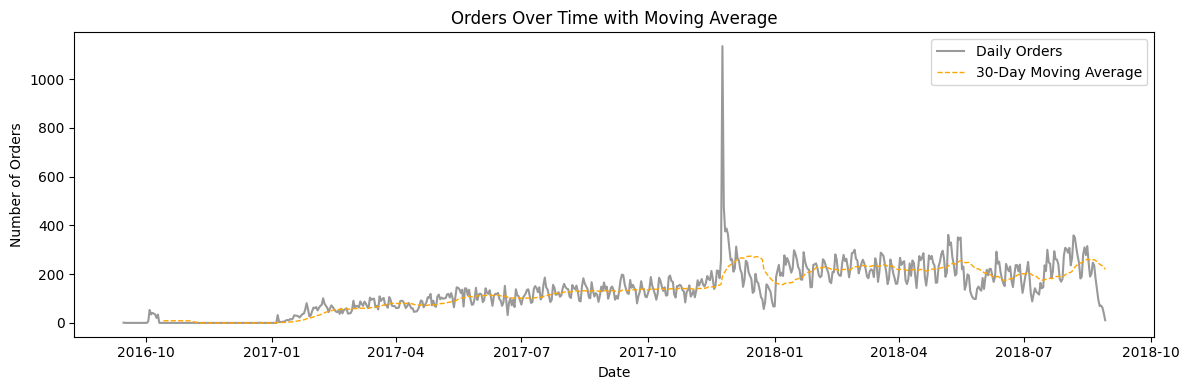

In [54]:
# Trend Pembelian Harian
orders_per_day = (
    df_eda
    .set_index('order_purchase_timestamp')
    .resample('D')
    .size()
)

# Hitung moving average
ma_30 = orders_per_day.rolling(window=30).mean()

plt.figure(figsize=(12,4))

# Garis harian
plt.plot(
    orders_per_day,
    alpha=0.4,
    color='black',
    linewidth=1.5,
    label='Daily Orders'
)

# Moving averages
plt.plot(
    ma_30,
    linewidth=1,
    linestyle='--',
    color='orange',
    label='30-Day Moving Average'
)

plt.title('Orders Over Time with Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa jumlah pesanan mengalami tren meningkat secara bertahap dari akhir 2016 hingga pertengahan 2018, yang terlihat jelas pada garis 30-day moving average. Pada fase awal, volume pesanan masih rendah dan relatif stabil, kemudian mulai tumbuh konsisten sejak awal 2017. Menjelang pertengahan hingga akhir 2018, tren cenderung stabil dengan volatilitas harian yang cukup tinggi

## Analisis Target (Order Days)

Target pada project ini adalah memprediksi lama waktu pengiriman atau order days. pada section ini akan dibahas dan dilihat pesebaran data, identifikasi data ekstrem (outliers), dan korelasi nya dengan fitur-fitur yang ada dalam dataset.

### Distribusi target (order days)

In [55]:
df_eda['order_days'].describe()

count    94615.000000
mean        12.081795
std          9.546297
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: order_days, dtype: float64

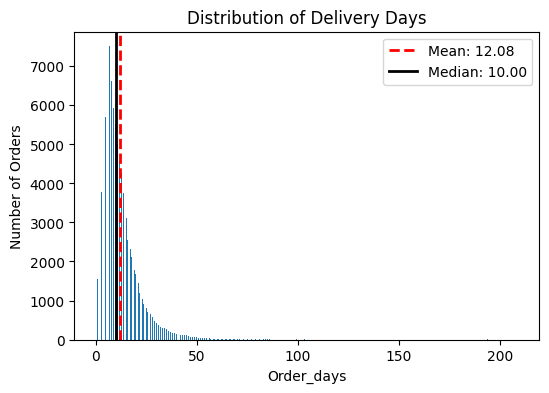

In [56]:
counts = df_cleaned['order_days'].value_counts().sort_index()

mean_val = df_cleaned['order_days'].mean()
median_val = df_cleaned['order_days'].median()

plt.figure(figsize=(6,4))
plt.hist(df_cleaned['order_days'], bins='auto')

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='black', linestyle='-', linewidth=2,
            label=f'Median: {median_val:.2f}')

plt.title('Distribution of Delivery Days')
plt.xlabel('Order_days')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

Nilai maksimum sangat tinggi ada di angka 209, sementara mean dan median nya hanya berada di 12 dan 10, perlu diselidiki lebih lanjut mengenai nilai outliers pada data target

In [57]:
# Outliers Detection
Q1 = df_eda['order_days'].quantile(0.25)
Q3 = df_eda['order_days'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_eda[(df_eda['order_days'] < lower_bound) | (df_eda['order_days'] > upper_bound)]

# Count percentage of outliers
outlier_percentage = (len(outliers) / len(df_eda)) * 100

print(f"Q1: {Q1:.0f}")
print(f"Q3: {Q3:.0f}")
print(f"IQR: {IQR:.0f}")
print(f"Lower Bound: {lower_bound:.0f}")
print(f"Upper Bound: {upper_bound:.0f}")
print(f"Jumlah outlier: {len(outliers)} dari {len(df_eda)} data ({outlier_percentage:.2f}%)")

Q1: 6
Q3: 15
IQR: 9
Lower Bound: -8
Upper Bound: 28
Jumlah outlier: 4917 dari 94615 data (5.20%)


Terdapat 4917 dari 94615 data outliers (5,2%) dan data tersebut tidak terlalu ekstrim terutama untuk kategori data operasional dan logistik, sehingga data tersebut sebaiknya dibiarkan saja.

### Distribusi dan Korelasi terhadap fitur numerik

perlu dilihat distribusi fitur numerik terhadap total order days dan dianalisis terkait normalitasnya

In [58]:
# Groupping fitur numerik
num_features = [
    'order_item_id',
    'price',
    'product_weight_g',
    'product_height_cm',
    'distance_km',
    'product_length_cm',
    'product_width_cm'
]

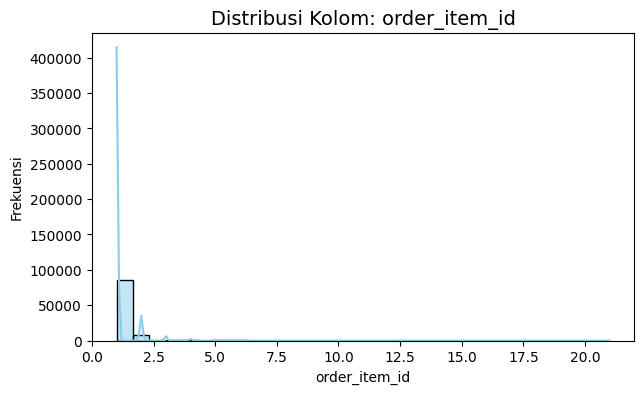

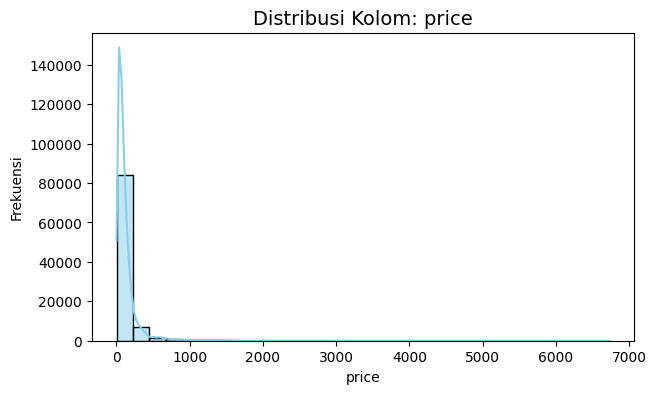

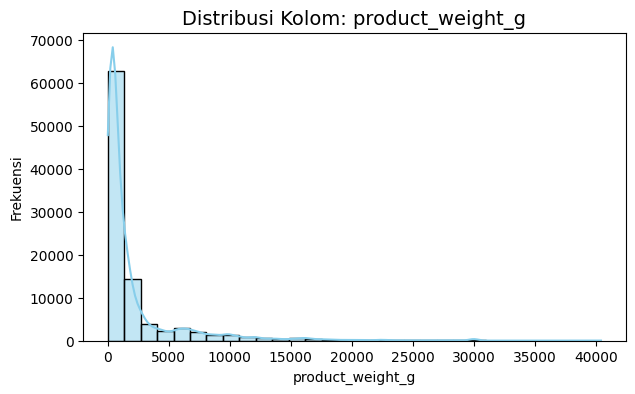

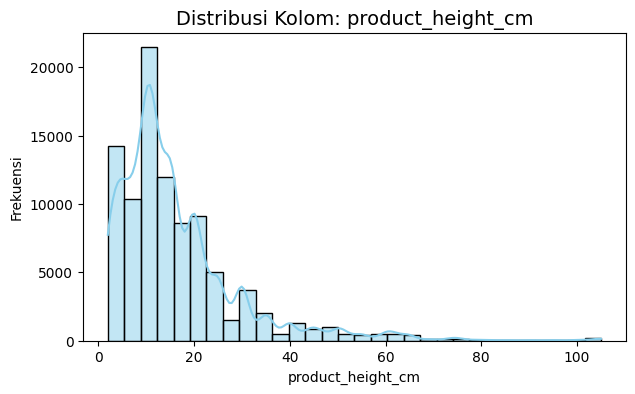

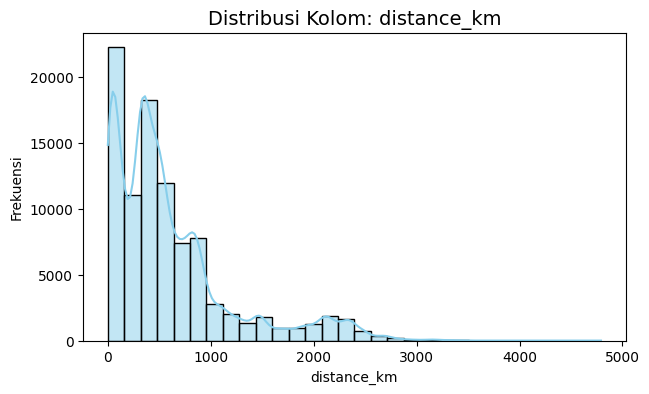

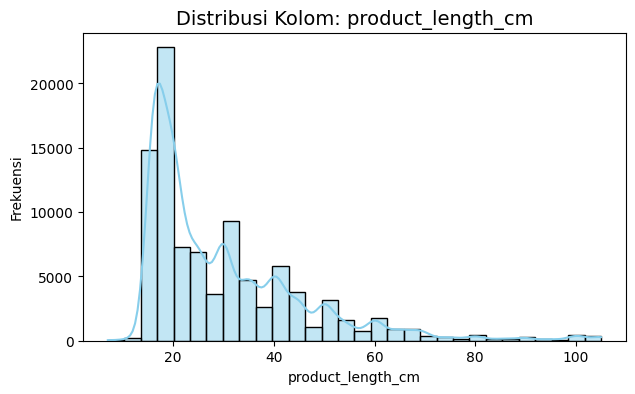

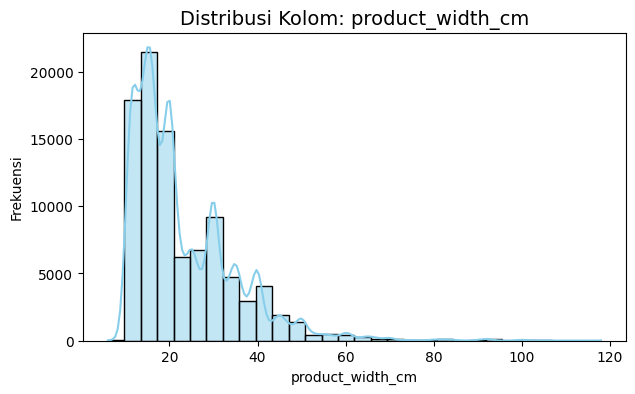

In [59]:
# Distribusi fitur Numerik

for col in num_features:
    plt.figure(figsize=(7,4))
    sns.histplot(df_eda[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi Kolom: {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

In [60]:
# Uji normalitas fitur numerik
normality_results = {}
for col in num_features:
    data_sample = df_eda[col].dropna().sample(min(5000, len(df_eda)), random_state=42)
    stat, p_value = shapiro(data_sample)
    normality_results[col] = {'Shapiro_Statistic': stat, 'p-value': p_value}
normality_df = pd.DataFrame(normality_results).T
normality_df = normality_df.sort_values(by='p-value', ascending=True)
display(normality_df)

,Shapiro_Statistic,p-value
order_item_id,0.278841,2.872976e-88
price,0.518335,2.415642e-79
product_weight_g,0.552126,8.704823e-78
product_height_cm,0.810045,1.280068e-60
distance_km,0.817659,7.433647e-60
product_length_cm,0.821068,1.667423e-59
product_width_cm,0.850325,3.076786e-56


Hasil uji Shapiro–Wilk dan visualisasi distribusi menunjukkan bahwa semua kolom numerik dalam dataset tidak berdistribusi normal (Semua p-value < 0.05 ⟹ menolak H₀ (data tidak berdistribusi normal)).

In [61]:
# Korelasi fitur numerik terhadap target

num_target_corr = df_eda[num_features + ['order_days']].corr(method='spearman')

corr_table = (
    num_target_corr['order_days']
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={
        'index': 'Feature',
        'order_days': 'Spearman Correlation'
    })
)

corr_table = corr_table[corr_table["Feature"] != "order_days"]
corr_table

,Feature,Spearman Correlation
1,distance_km,0.541820
2,price,0.110307
3,product_weight_g,0.095601
4,product_length_cm,0.075837
5,product_height_cm,0.055388
6,product_width_cm,0.043988
7,order_item_id,-0.024950


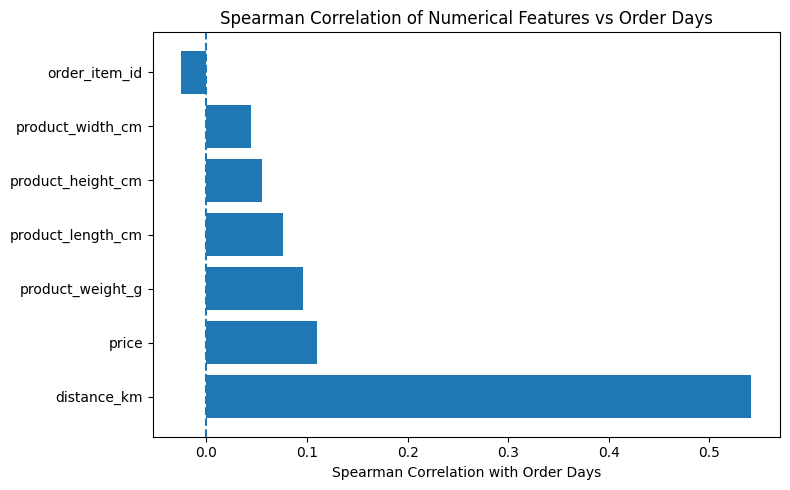

In [62]:
plt.figure(figsize=(8, 5))

plt.barh(
    corr_table["Feature"],
    corr_table["Spearman Correlation"]
)

plt.axvline(0, linestyle="--")
plt.xlabel("Spearman Correlation with Order Days")
plt.title("Spearman Correlation of Numerical Features vs Order Days")

plt.tight_layout()
plt.show()

Berdasarkan data diatas terkait korelasi fitur numerik dan target (numerik) digunakan metode Spearman, karena pada analisis terhadap target ini yang lebih ingin dilihat perilaku sistem dan bukan pada struktur data dan cocok untuk data dengan banyak outlier.

Dapat dilihat bahwa hanya 1 fitur yang benar-benar kuat berkorelasi positif dengan target yaitu **distance_km** (0,54), yang berarti Semakin jauh jarak pengiriman, semakin lama waktu delivery. Dapat diduga bahwa order_days didominasi faktor geografis dan semua fitur numerik lain hanya faktor sekunder.

Price berkorelasi lemah tapi positif (0.11), yang berarti barang mahal sedikit lebih lama sampai, dimana barang mahal umumnya memerlukan proses packing yang lebih hati-hati atau perlu ada asuransi atau verifikasi tambahan.

Berat & dimensi produk berkorelasi lemah positif (0.04 – 0.10), yang berarti produk besar & berat cenderung sedikit lebih lama dikirim. Korelasi yang kecil memungkinkan bahwa pihak kurir sudah mengoptimalkan pengiriman ukuran besar dan ukuran memengaruhi ongkir, bukan kecepatan pengiriman. Maka dari itu, dimensi barang bukanlah bottleneck utama.

order_item_id Tidak relevan (-0.025), dimana jumlah barang tidak mempengaruhi waktu pengiriman.

### Distribusi Korelasi terhadap fitur binary kategorik

Selanjutnya dilakukan analisis terkait distribusi kategori binerik pada dataset terhadap order days

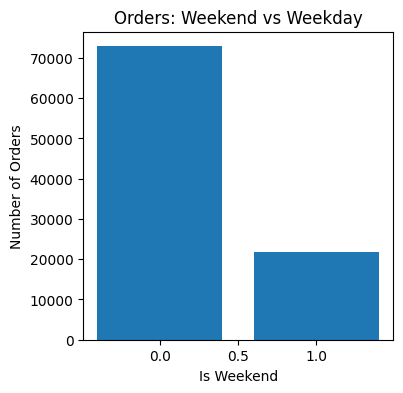

In [63]:
# Distribusi fitur Katogorik
# weekend order
weekend_counts = df_eda['is_weekend'].value_counts()

plt.figure(figsize=(4,4))
plt.bar(weekend_counts.index, weekend_counts.values)
plt.title('Orders: Weekend vs Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Number of Orders')
plt.show()

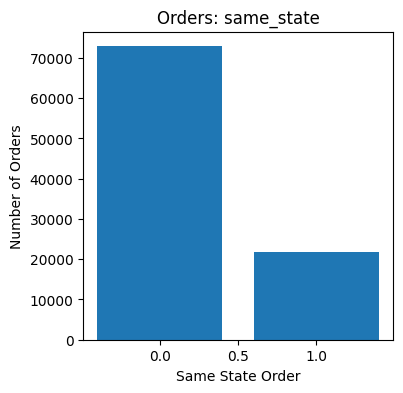

In [64]:
# Distribusi fitur Katogorik
# same state order
samestate_counts = df_eda['same_state'].value_counts()

plt.figure(figsize=(4,4))
plt.bar(weekend_counts.index, weekend_counts.values)
plt.title('Orders: same_state')
plt.xlabel('Same State Order')
plt.ylabel('Number of Orders')
plt.show()

In [65]:
binary_features = ['is_weekend', 'same_state']

results = []

for col in binary_features:
    corr, p = pointbiserialr(df_eda[col].astype(int), df_eda['order_days'])
    results.append({
        "Feature": col,
        "PointBiserial_Correlation": corr,
        "P_Value": p
    })

binary_corr_df = pd.DataFrame(results)

binary_corr_df

,Feature,PointBiserial_Correlation,P_Value
0,is_weekend,0.003648,0.261778
1,same_state,-0.362583,0.000000


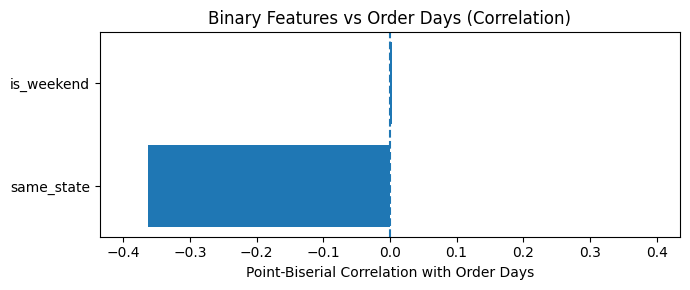

In [66]:
plot_df = binary_corr_df.sort_values(
    by="PointBiserial_Correlation",
    ascending=True
)

plt.figure(figsize=(7, 3))

plt.barh(
    plot_df["Feature"],
    plot_df["PointBiserial_Correlation"]
)

# Zero reference line
plt.axvline(0, linestyle="--")

# Make scale tighter & relevant
max_abs = np.max(np.abs(plot_df["PointBiserial_Correlation"]))
plt.xlim(-max_abs * 1.2, max_abs * 1.2)

plt.xlabel("Point-Biserial Correlation with Order Days")
plt.title("Binary Features vs Order Days (Correlation)")

plt.tight_layout()
plt.show()

Korelasi terhadap fitur **same_state** (order dalam satu state yang sama) menunjukkan nilai negatif yang menengah, hal ini menunjukkan bahwa pada order dalam state yang sama akan mempercepat hari pengiriman barang. 

sementara pada fitur **weekend** ditemukan nilai korelasi yang sangat lemah, hal ini menunjukkan pemesanan pada weekend tidak terlalu signifikan mempengaruhi lama nya hari pengiriman barang. kedua hal tersebut pun didukung kuat oleh nilai p-value, dimana *pada nilai p value < 0.05 mengindikasikan hubungan signifikan secara statistik*.

### Korelasi terhadap fitur kategorikal (multi-class)

Pada fitur ini lebih cocok untuk melihat menggunakan boxplot dibandingkan menggunakan korelasi (dapat dilakukan dengan metode ANOVA). Boxplot dipilih karena tujuan analisis adalah memahami distribusi dan pola keterlambatan pengiriman secara nyata, bukan sekadar menguji perbedaan rata-rata antar kelompok.

#### Customer State

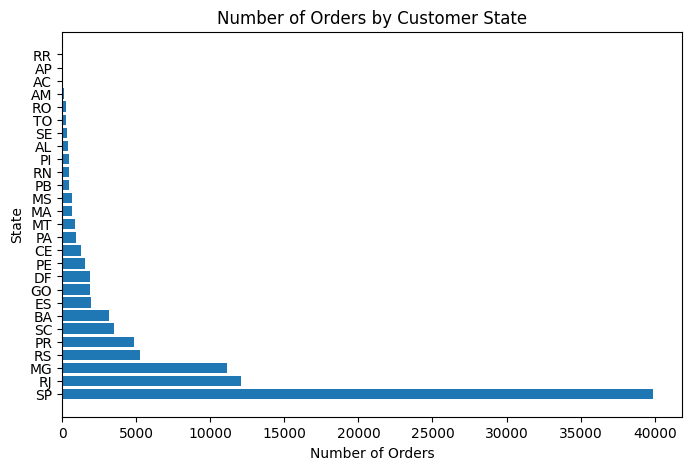

In [67]:
# Customer State Distribution

state_counts = df_eda['customer_state'].value_counts()

plt.figure(figsize=(8,5))
plt.barh(state_counts.index, state_counts.values)
plt.title('Number of Orders by Customer State')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.show()

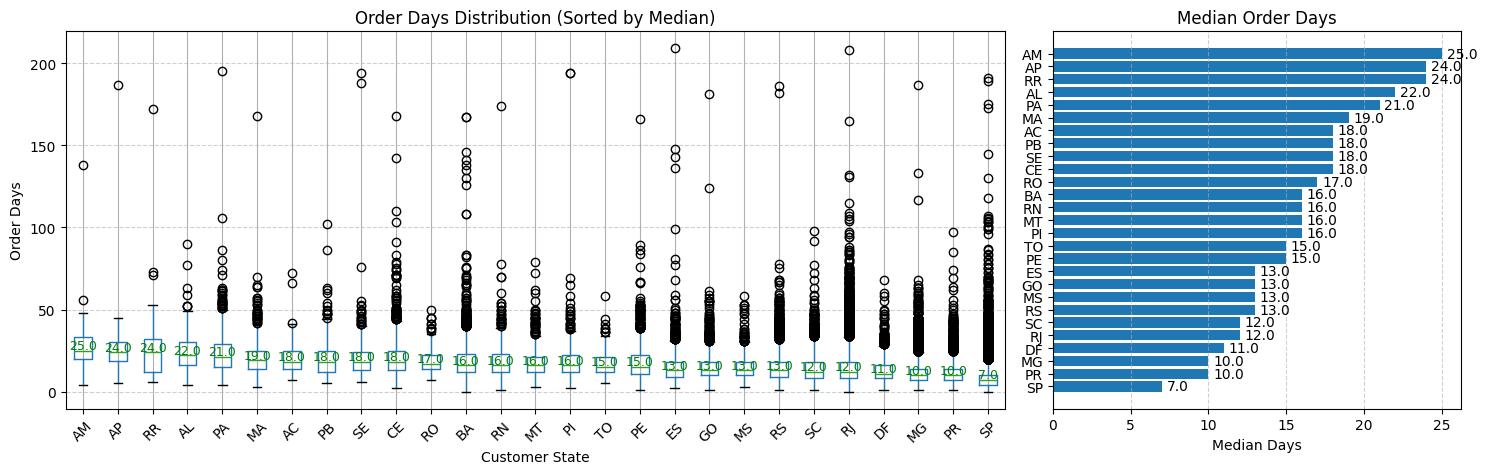

In [68]:
# Customer State vs Order Days

top_states = df_eda['customer_state'].value_counts().head(27).index
df_top = df_eda[df_eda['customer_state'].isin(top_states)]

medians = (
    df_top
    .groupby('customer_state')['order_days']
    .median()
    .sort_values(ascending=False)
)

ordered_states = medians.index.tolist()
df_top['customer_state'] = pd.Categorical(
    df_top['customer_state'],
    categories=ordered_states,
    ordered=True
)

fig, axes = plt.subplots(
    ncols=2,
    figsize=(15, 5),
    gridspec_kw={'width_ratios': [2.3, 1]}
)

# LEFT: Boxplot (SORTED)
df_top.boxplot(
    column='order_days',
    by='customer_state',
    ax=axes[0],
    rot=45
)

axes[0].set_title('Order Days Distribution (Sorted by Median)')
axes[0].set_ylabel('Order Days')
axes[0].set_xlabel('Customer State')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Add median labels on boxplot
for i, state in enumerate(ordered_states, start=1):
    axes[0].text(
        i,
        medians[state] + 1,
        f'{medians[state]:.1f}',
        ha='center',
        fontsize=9,
        color='green'
    )
plt.suptitle('')


# RIGHT: Median Bar Chart
axes[1].barh(
    ordered_states,
    medians.values
)

axes[1].invert_yaxis()
axes[1].set_title('Median Order Days')
axes[1].set_xlabel('Median Days')
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# Annotate bar values
for i, v in enumerate(medians.values):
    axes[1].text(v + 0.3, i, f'{v:.1f}', va='center')

plt.tight_layout()
plt.show()


Berdasarkan data diatas terkait boxplot customer_state vs order_days dapat dilihat bahwa perbedaan delivery time antar state cukup tinggi, dimana median semua state berada di kisaran 7 – 25 hari. SP (Sao Paulo) adalah state dengan median order days yang paling cepat, yang diperkuat karena 22% penduduk Brazil tinggal dalam state ini, yang sekaligus menjadi state dengan populasi tertinggi di brazil (46 Juta jiwa pada 2018)

Analisis terhadap customer state menunjukkan bahwa beberapa state seperti AM dan AL memiliki waktu pengiriman tipikal yang lebih lama dibanding state lainnya. Namun, perbedaan median antar state relatif terbatas dan distribusi order_days masih saling tumpang tindih. Selain itu, keterlambatan ekstrem terjadi di seluruh state, mengindikasikan bahwa faktor operasional khusus juga berperan dalam mempengaruhi keterlambatan pengiriman.

Berdasarkan kedua grafik diatas dapat diindikasikan bahwa customer_state berperan signifikan dalam mempengaruhi hari pengiriman.

#### Product Category

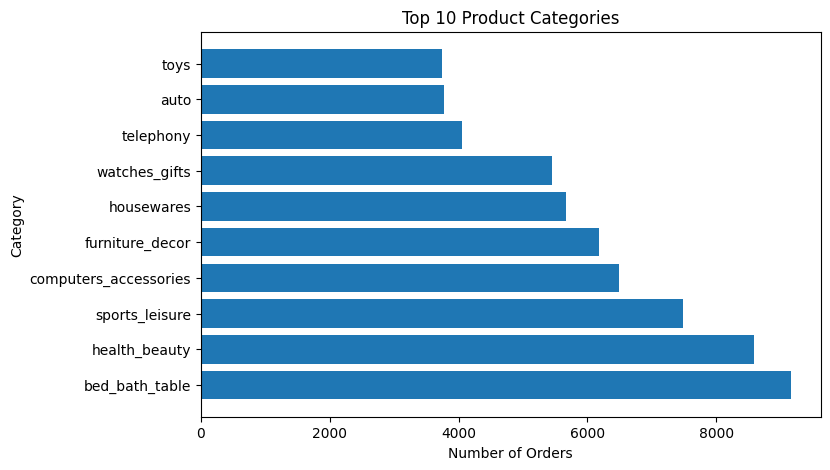

In [69]:
# category product
top_cat = df_eda['product_category_name_english'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_cat.index, top_cat.values)
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Category')
plt.show()

C:\Users\gabriella s\AppData\Local\Temp\ipykernel_16432\1275124052.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['product_category_name_english', 'order_days_bin'])


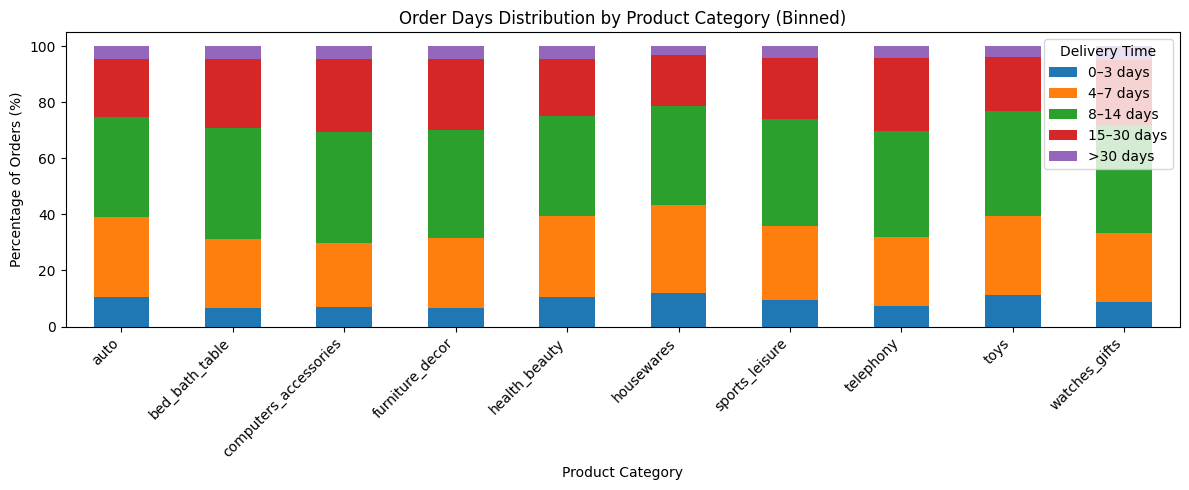

In [70]:
# Product Category

bins = [-1, 3, 7, 14, 30, 999]
labels = ['0–3 days', '4–7 days', '8–14 days', '15–30 days', '>30 days']

df_eda['order_days_bin'] = pd.cut(
    df_eda['order_days'],
    bins=bins,
    labels=labels
)

# Top 10 product categories
top_category = df_eda['product_category_name_english'].value_counts().head(10).index

df_cat = df_eda[df_eda['product_category_name_english'].isin(top_category)]

# Count per bin
bin_dist = (
    df_cat
    .groupby(['product_category_name_english', 'order_days_bin'])
    .size()
    .unstack(fill_value=0)
)

# Convert to percentage (optional but recommended)
bin_pct = bin_dist.div(bin_dist.sum(axis=1), axis=0) * 100

# Plot
bin_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12,5)
)

plt.title('Order Days Distribution by Product Category (Binned)')
plt.ylabel('Percentage of Orders (%)')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delivery Time')
plt.tight_layout()
plt.show()


Distribusi waktu pengiriman menunjukkan bahwa di hampir semua kategori produk, mayoritas pesanan berada pada rentang 8–14 hari, namun tetap terdapat porsi yang konsisten pada keterlambatan 15 hari ke atas, bahkan hingga >30 hari. Hal ini menandakan bahwa risiko keterlambatan bukan hanya disebabkan oleh kasus ekstrem semata, melainkan merupakan risiko tail yang sistemik di berbagai kategori. 

Menariknya, kategori dengan produk relatif ringan seperti health_beauty, watches_gifts, dan toys juga masih memiliki proporsi keterlambatan panjang yang cukup signifikan, sehingga mengindikasikan bahwa faktor keterlambatan tidak hanya dipengaruhi oleh berat atau dimensi produk, tetapi juga oleh proses logistik, routing, dan performa pengiriman. Selain itu, proporsi pengiriman sangat cepat (0–3 hari) terlihat kecil di semua kategori, yang menunjukkan bahwa tantangan utama bisnis bukan pada percepatan pengiriman rata-rata, melainkan pada pengendalian risiko keterlambatan ekstrem.

### Analisis Korelasi Antar Fitur

Dilakukan analisis antar fitur untuk mengetahui apakah ada fitur yang memiliki korelasi tinggi terhadap fitur lain sehingga menjadi redundant dan dapat dianalisis lebih dalam untuk dihapus.

In [71]:
# Korelasi fitur Numerik

corr_matrix = df_eda[num_features].corr(method='pearson')
corr_matrix

,order_item_id,price,product_weight_g,product_height_cm,distance_km,product_length_cm,product_width_cm
order_item_id,1.000000,-0.059199,-0.004626,0.017103,-0.016932,0.006393,-0.005996
price,-0.059199,1.000000,0.345314,0.233056,0.083515,0.145743,0.175317
product_weight_g,-0.004626,0.345314,1.000000,0.583192,-0.008061,0.463649,0.513233
product_height_cm,0.017103,0.233056,0.583192,1.000000,0.000348,0.192431,0.288285
distance_km,-0.016932,0.083515,-0.008061,0.000348,1.000000,-0.005390,-0.020852
product_length_cm,0.006393,0.145743,0.463649,0.192431,-0.005390,1.000000,0.547211
product_width_cm,-0.005996,0.175317,0.513233,0.288285,-0.020852,0.547211,1.000000


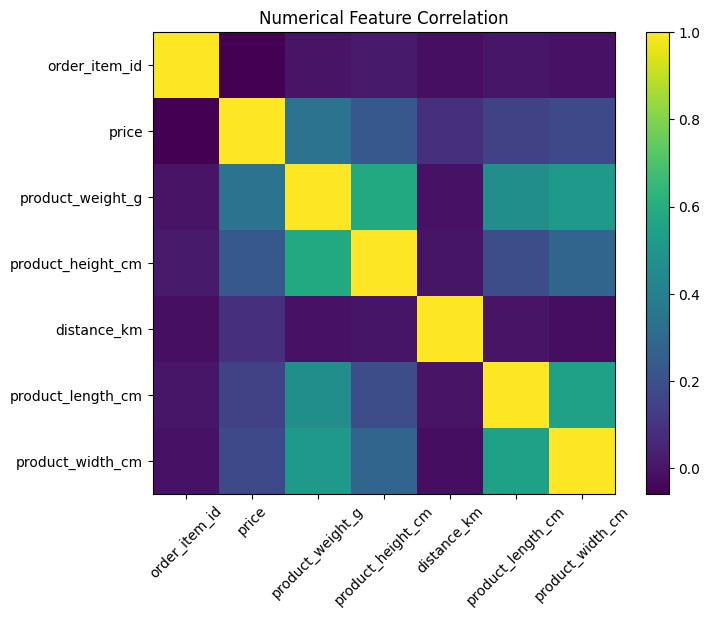

In [72]:
# Heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(num_features)), num_features, rotation=45)
plt.yticks(range(len(num_features)), num_features)
plt.title('Numerical Feature Correlation')
plt.show()

Berdasarkan data dan heatmap diatas terkait korelasi antar fitur numerik digunakan metode Pearson, karena metode ini cocok untuk mengukur hubungan linear dan menangkap multikolinearitas, dan sensitif terhadap perubahan skala. Spearman tidak digunakan pada analisis ini karena berfokus pada struktur bukan perilaku data.

Dapat dilihat bahwa sebagian besar fitur numerik tidak saling berkorelasi kuat, korelasi yang kuat muncul pada dimensi dan berat produk, berikut adalah penjelasan singkat:
- product_weight_g dan product_height_cm (corr = 0,583) = Semakin tinggi produk, biasanya semakin berat
- product_weight_g dan product_width_cm (corr = 0,513) = Produk yang lebar cenderung lebih berat
- product_weight_g dan product_length_cm ( corr = 0,464) = Panjang produk juga berkontribusi ke berat

**"Kombinasi panjang × lebar × tinggi = volume → berat"**

- product_length_cm dan product_width_cm (corr = 0,547) = Produk panjang biasanya juga lebar
- price dan product_weight_g (corr = 0,345) = Korelasi sedang → Produk yang lebih berat cenderung lebih mahal tapi tidak selalu (bisa saja produk ringan juga mahal)
- price dan product_height_cm / width / length = (corr = 0.14 – 0.23) = Korelasi lemah ke sedang → Dimensi berpengaruh ke harga, tapi bukan faktor utama
- distance_km dan fitur lain = corr = 0 = Jarak pengiriman tidak bergantung pada ukuran, berat, atau harga dimana lokasi customer bersifat independen terhadap produk
- order_item_id Tidak Berkorelasi = Jumlah barang tidak mempengaruhi apapun

# Data Analysis

## Analisis Hari Keterlambatan terhadap fitur

Analisis ini bertujuan untuk mengetahui pengaruh fitur terhadap keterlambatan order. pada section ini sudah terfokus pada masalah keterlambatan, yang didefinisikan sebagai order days yang melebihi estimasi dari sistem eksisting Olist. berikut adalah formula perhitungan, dimana baseline duration days adalah nilai terbakan sistem eksisting. order terlambat (error) adalah jika order days aktual melebihi order days baseline.

### Distribusi Hari Error (Positif terlambat, negatif terlalu cepat)

In [73]:
# Baseline Metrics
df_da["actual_duration_days"] = (
    df_da["order_delivered_customer_date"]
    - df_da["order_purchase_timestamp"]
).dt.days

df_da["baseline_duration_days"] = (
    df_da["order_estimated_delivery_date"]
    - df_da["order_purchase_timestamp"]
).dt.days

df_da["baseline_error_days"] = (
    df_da["baseline_duration_days"]
    - df_da["actual_duration_days"]
)

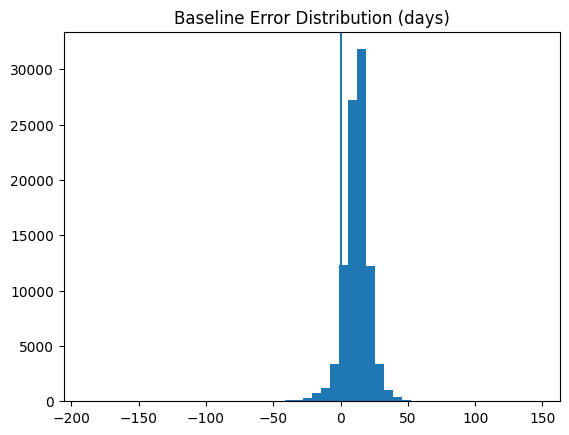

In [74]:
plt.hist(df_da["baseline_error_days"], bins=50)
plt.axvline(0)
plt.title("Baseline Error Distribution (days)")
plt.show()

Distribusi baseline error menunjukkan bahwa sebagian besar prediksi ETA saat ini terkonsentrasi di sekitar nilai 0, yang berarti banyak pengiriman diperkirakan cukup dekat dengan durasi aktualnya. Namun, distribusi ini tidak simetris dan memiliki ekor kanan yang lebih panjang, menandakan adanya sejumlah pengiriman dengan keterlambatan signifikan (under-prediction ETA) dibandingkan estimasi awal. Sementara itu, ekor kiri yang lebih pendek menunjukkan kasus over-prediction (estimasi terlalu lama) relatif lebih sedikit dan lebih terbatas skalanya. Pola ini mengindikasikan bahwa sistem ETA baseline cenderung optimistis, sering kali meremehkan durasi pengiriman pada kasus ekstrem, yang berpotensi meningkatkan risiko keterlambatan dan ketidakpuasan pelanggan. Temuan ini memperkuat kebutuhan akan pendekatan yang lebih risk-aware, seperti quantile regression, untuk mengendalikan tail risk dan mengurangi dampak keterlambatan besar.

### Analisis Error Days terhadap kategori Produk

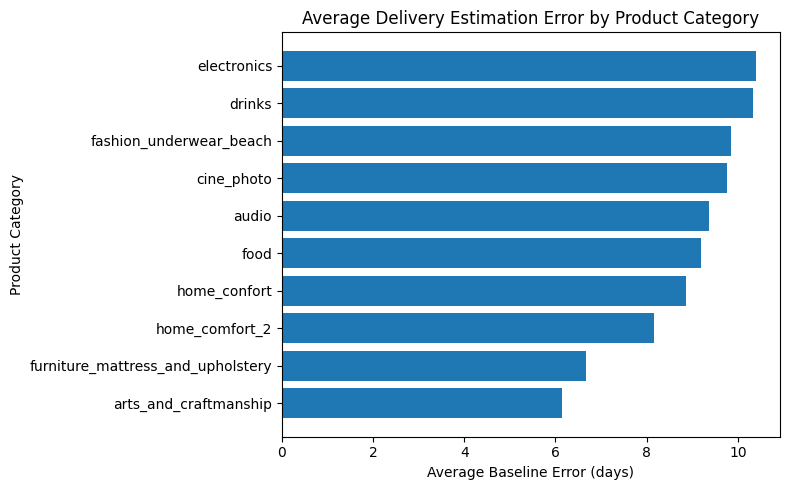

In [75]:
category_error = (
    df_da
    .assign(is_late = df_da["baseline_error_days"] > 0)
    .groupby("product_category_name_english")
    .agg(
        Mean_Error_Days=("baseline_error_days", "mean"),
        Late_Rate=("is_late", "mean"),
        Total_Orders=("baseline_error_days", "count")
    )
    .sort_values("Mean_Error_Days")
)

# Ambil Top 10 (error terendah → tertinggi)
category_error_top10 = category_error.head(10)

plt.figure(figsize=(8,5))

plt.barh(
    category_error_top10.index,
    category_error_top10["Mean_Error_Days"]
)

plt.xlabel("Average Baseline Error (days)")
plt.ylabel("Product Category")
plt.title("Average Delivery Estimation Error by Product Category")



plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa kategori produk memiliki pengaruh yang jelas terhadap akurasi estimasi pengiriman. Produk seperti arts_and_craftmanship dan furniture_mattress_and_upholstery memiliki rata-rata error yang lebih rendah, menandakan estimasi pengiriman yang relatif stabil. Sebaliknya, kategori seperti electronics, drinks, dan fashion_underwear_beach menunjukkan error yang lebih tinggi.

### Analisis Error Days terhadap customer state

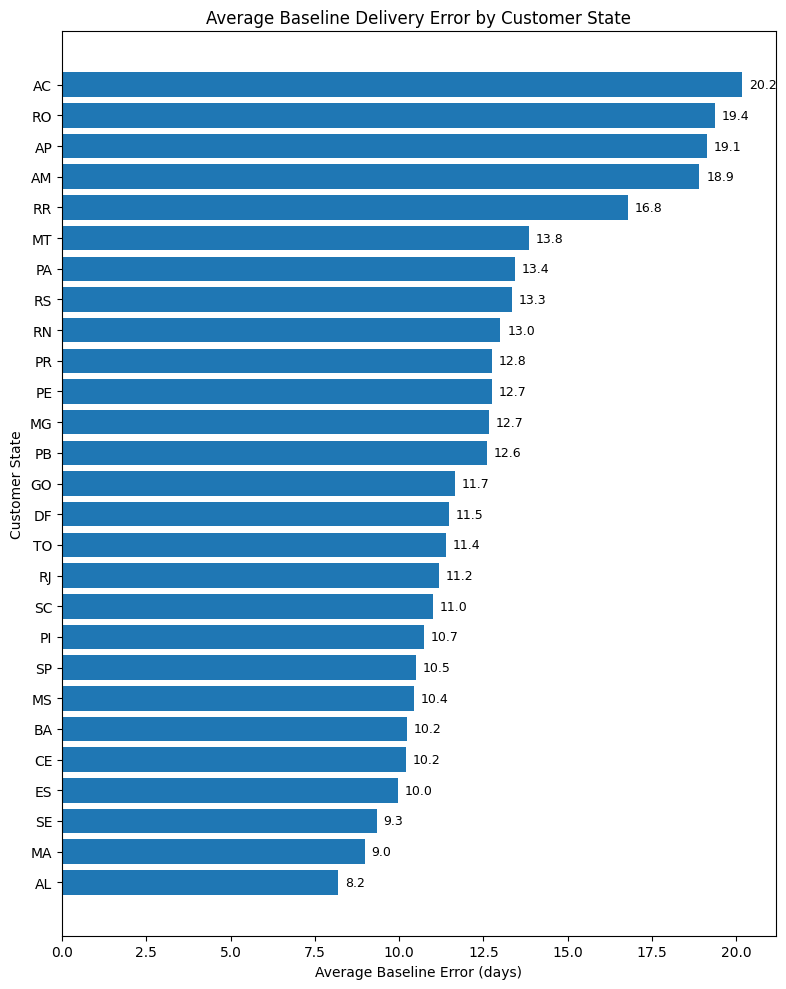

In [76]:
customer_state_error = (
    df_da.groupby("customer_state")["baseline_error_days"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(8,10))
plt.barh(
    customer_state_error.index,
    customer_state_error.values
)

plt.xlabel("Average Baseline Error (days)")
plt.ylabel("Customer State")
plt.title("Average Baseline Delivery Error by Customer State")

# Tambahkan nilai di ujung bar
for i, v in enumerate(customer_state_error.values):
    plt.text(v + 0.2, i, f"{v:.1f}", va="center", fontsize=9)

plt.tight_layout()
plt.show()

Grafik ini menunjukkan adanya perbedaan yang cukup signifikan pada rata-rata error estimasi pengiriman antar customer state. Beberapa state seperti AC, RO, AP, dan AM memiliki error rata-rata paling tinggi, yang mengindikasikan bahwa estimasi pengiriman di wilayah tersebut cenderung kurang akurat. Sebaliknya, state seperti AL, MA, dan SE menunjukkan error yang lebih rendah, menandakan proses estimasi yang relatif lebih stabil. Pola ini mengindikasikan bahwa faktor geografis dan distribusi wilayah berperan penting dalam ketepatan estimasi pengiriman.

### Analisis Error Days terhadap weekend

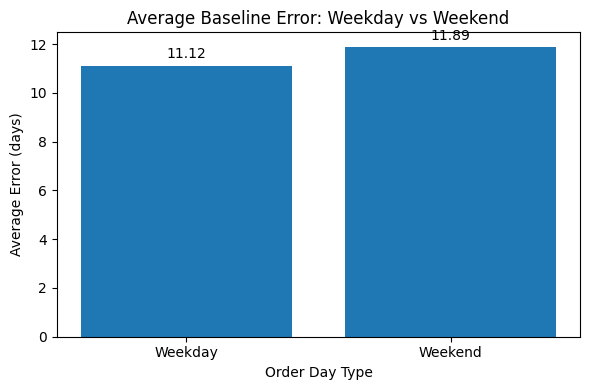

In [77]:
df_da["order_weekday"] = df_da["order_purchase_timestamp"].dt.weekday

# Binning weekday vs weekend
df_da["day_type"] = df_da["order_weekday"].apply(
    lambda x: "Weekend" if x >= 5 else "Weekday"
)

# Hitung rata-rata baseline error
weekday_weekend_error = (
    df_da
    .groupby("day_type")["baseline_error_days"]
    .mean()
    .reindex(["Weekday", "Weekend"])  # urutan rapi
)
plt.figure(figsize=(6,4))
plt.bar(
    weekday_weekend_error.index,
    weekday_weekend_error.values
)


plt.title("Average Baseline Error: Weekday vs Weekend")
plt.ylabel("Average Error (days)")
plt.xlabel("Order Day Type")

# Tambahkan label nilai
for i, v in enumerate(weekday_weekend_error.values):
    plt.text(i, v + 0.3, f"{v:.2f}", ha="center")

plt.tight_layout()
plt.show()

Grafik ini menunjukkan bahwa rata-rata error estimasi pengiriman lebih tinggi pada pesanan akhir pekan dibandingkan hari kerja. Hal ini mengindikasikan bahwa proses logistik di akhir pekan cenderung kurang optimal, sehingga estimasi pengiriman lebih sering meleset. Namun perbedaan nilai relatif kecil, sehingga bukan menjadi faktor utama dalam menentukan hari keterlambatan pengiriman barang.

### Analisis Error Days terhadap bulan pembelian

In [78]:
df_eda["order_month"] = df_eda["order_purchase_timestamp"].dt.month

df_eda.groupby("order_month")["baseline_error_days"].mean()

order_month
1     13.801998
2      9.866700
3      7.455003
4     12.366215
5     12.115753
6     16.450983
7     11.213592
8      9.461279
9     10.679784
10    12.664592
11     7.534780
12    12.437617
Name: baseline_error_days, dtype: float64

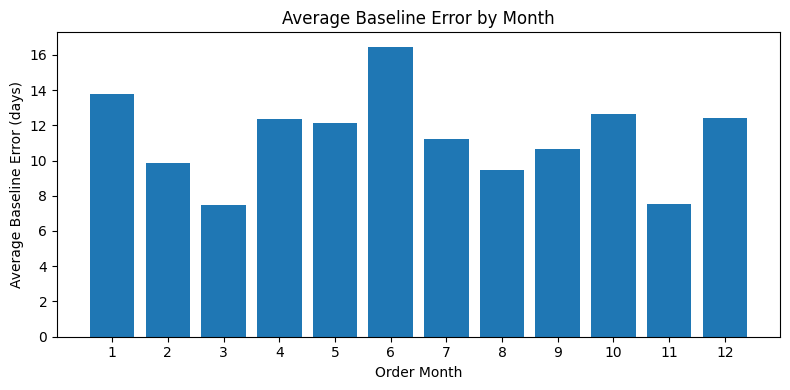

In [79]:
monthly_error = (
    df_da
    .groupby("order_month")["baseline_error_days"]
    .mean()
)

plt.figure(figsize=(8,4))
plt.bar(monthly_error.index, monthly_error.values)

plt.title("Average Baseline Error by Month")
plt.xlabel("Order Month")
plt.ylabel("Average Baseline Error (days)")
plt.xticks(monthly_error.index)

plt.tight_layout()
plt.show()

Grafik rata-rata baseline error per bulan menunjukkan bahwa akurasi estimasi waktu pengiriman berubah-ubah sepanjang bulan. Pada beberapa bulan, rata-rata error lebih tinggi, Pola ini menunjukkan adanya pengaruh musiman terhadap kinerja estimasi pengiriman, seperti perbedaan volume pesanan atau kondisi operasional di waktu tertentu

## Analisis Performa Sistem Prediksi Eksisting

Setelah sebelumnya pada section EDA dibahas mengenai Baseline error, pada section ini akan dibahas dan dihitung performa/tingkat kesalahan dari nilai estimasi delivery date yang existing digenerate oleh Olist. Hasil ini akan digunakan sebagai pembanding terhadap prediksi delivery date yang akan dibuat dengan pendekatan ML pada project ini.

**existing_error_days = (order_delivered_customer_date - order_estimated_delivery_date)**

In [80]:
df_da.head()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_state,order_item_id,price,review_score,product_weight_g,product_length_cm,product_height_cm,...,is_weekend,same_state,distance_km,order_days_bin,actual_duration_days,baseline_duration_days,baseline_error_days,order_weekday,day_type,order_month
0,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04,SP,3.0,44.99,1.0,1000.0,16.0,16.0,...,0,0,565.959812,>30 days,54,18,-36,3,Weekday,9
1,2016-10-03 09:44:50,2016-10-26 14:02:13,2016-10-27,SP,1.0,29.90,4.0,300.0,16.0,16.0,...,0,0,708.754247,15–30 days,23,23,0,0,Weekday,10
2,2016-10-03 16:56:50,2016-10-27 18:19:38,2016-11-07,RS,1.0,21.90,4.0,400.0,16.0,16.0,...,0,0,915.912412,15–30 days,24,34,10,0,Weekday,10
3,2016-10-03 21:13:36,2016-11-03 10:58:07,2016-11-29,RS,1.0,36.49,3.0,767.0,26.0,8.0,...,0,0,818.146504,15–30 days,30,56,26,0,Weekday,10
4,2016-10-03 22:06:03,2016-10-31 11:07:42,2016-11-23,SP,1.0,119.90,1.0,2050.0,40.0,11.0,...,0,1,212.014865,15–30 days,27,50,23,0,Weekday,10


In [81]:
df_da['existing_error_days'] = (
    df_da['order_delivered_customer_date']
    - df_da['order_estimated_delivery_date']
).dt.days

df_da['abs_existing_error_days'] = df['existing_error_days'].abs()

In [82]:
medae_existing = df_da['existing_error_days'].abs().median()
mae_existing = df_da['existing_error_days'].abs().mean()

medae_existing, mae_existing

(np.float64(13.0), np.float64(13.325244411562648))

In [83]:
df_da['existing_error_days'].median()

np.float64(-12.0)

In [84]:
existing_late_rate = (df_da['existing_error_days'] > 0).mean()
existing_late_rate

np.float64(0.0675262907572795)

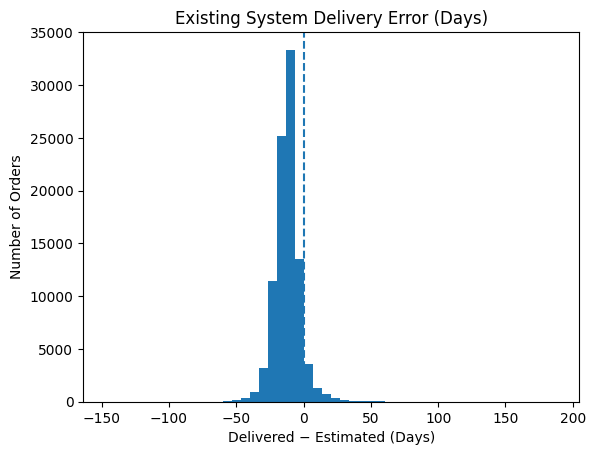

In [85]:
plt.hist(df_da['existing_error_days'], bins=50)
plt.axvline(0, linestyle='--')
plt.title('Existing System Delivery Error (Days)')
plt.xlabel('Delivered − Estimated (Days)')
plt.ylabel('Number of Orders')
plt.show()

Berdasarkan perhitungan diatas, secara statistik sebagai berikut adalah rangkumannya:
- Median AE = 13 hari (Median estimasi sistem existing meleset ≥ 13 hari dari tanggal sebenarnya.)
- MAE = 13.32 hari (Rata-rata kesalahan estimasi sistem lama ≈ 2 minggu)
- Median error = −12 hari (Median Estimasi prediksi delivery day 12 hari lebih cepat dari aktual)
- Late Delivery Rate = 6% (Rata-rata barang dikirim terlambat)

Terkait Median AE nilai 13 hari cukup besar untuk konteks e-commerce/logistik. *berdasarkan data Laporan World Economic Forum (2018) mencatat bahwa konsumen relatif mau menunggu 3–6 hari untuk pengiriman pada segmen biaya rendah / gratis pengiriman. Berdasarkan Sciencedirect.com juga menjelaskan Studi dan laporan industri menunjukkan rata-rata pengiriman cepat di pasar maju berada di kisaran ~2–6 hari (contoh laporan ringkasan pasar). Untuk contoh konkrit, Amazon menurunkan rata-rata lead time pengiriman menjadi sekitar 3 hari pada 2018 di pasar yang dilaporkan.*

Berdasarkan MAE pun menunjukkan nilai rata-rata kesalahan yang senilai, hal ini mengindikasikan sistem existing tidak presisi, bukan hanya “kadang-kadang salah”. lalu nilai median error pun menunjukkan nilai negatif yang berarti barang secara median datang lebih cepat hingga 12 hari, ini menunjukkan sistem eksisting sangat konservatif yang menunjukkan sistem lama mengorbankan akurasi demi “keamanan” estimasi.



## Analisis Lateness Severity

In [86]:
def lateness_severity_from_error(error):
    late_error = error[error > 0]

    if len(late_error) == 0:
        return {
            "Median_Late_Days": 0.0,
            "P90_Late_Days": 0.0
        }

    return {
        "Median_Late_Days": np.median(late_error),
        "P90_Late_Days": np.percentile(late_error, 90)
    }

existing_error = df_da['existing_error_days']

existing_severity = lateness_severity_from_error(existing_error)

In [87]:
existing_late = existing_error[existing_error > 0]

existing_lateness_df = pd.DataFrame([{
    "Model": "Existing System",
    "Late_Delivery_Rate": np.mean(existing_error > 0),
    "Mean_Late_Days": existing_late.mean(),
    "Median_Late_Days": np.median(existing_late),
    "P90_Late_Days": np.percentile(existing_late, 90),
    "Late_>7d_Rate": np.mean(existing_late > 7),
    "Late_>14d_Rate": np.mean(existing_late > 14),
    "Max_Late_Days": existing_late.max()
}])

existing_lateness_df

,Model,Late_Delivery_Rate,Mean_Late_Days,Median_Late_Days,P90_Late_Days,Late_>7d_Rate,Late_>14d_Rate,Max_Late_Days
0,Existing System,0.067526,10.62138,7.0,22.0,0.43841,0.21177,188


Meskipun sistem existing menunjukkan tingkat keterlambatan yang relatif rendah, analisis tingkat keparahan mengungkapkan bahwa keterlambatan yang terjadi cenderung signifikan. Hampir setengah dari keterlambatan melebihi satu minggu, dan lebih dari 20% melebihi dua minggu. Selain itu, ditemukannya keterlambatan ekstrem hingga ratusan hari menunjukkan bahwa sistem existing kurang mampu mengendalikan risiko pada kasus-kasus ekstrem, yang berpotensi berdampak negatif terhadap pengalaman pelanggan dan kepercayaan terhadap layanan.

## Analisis hari keterlambatan terhadap Review Score

Selanjutnya adalah analisis review score terhadap delivery time, yang mana digunakan korelasi dengan metode Spearman karena data bersifat ordinal.

In [88]:
# Menghitung korelasi order days dan review score
df_da[['review_score', 'order_days']].corr(method='spearman')

,review_score,order_days
review_score,1.000000,-0.235224
order_days,-0.235224,1.000000


dapat dilihat order days berkorelasi negatif menengah, yang menunjukkan bahwa semakin rendah hari pengiriman, maka semakin besar nilai review score

In [89]:
# Menghitung median dan count tiap score
summary = (
    df.groupby('review_score')['order_days']
    .agg(median_order_days='median', count='count')
)
summary

,median_order_days,count
review_score,,
1.0,16.0,9121
2.0,13.0,2856
3.0,12.0,7786
4.0,10.0,18522
5.0,9.0,55693


<Figure size 700x400 with 0 Axes>

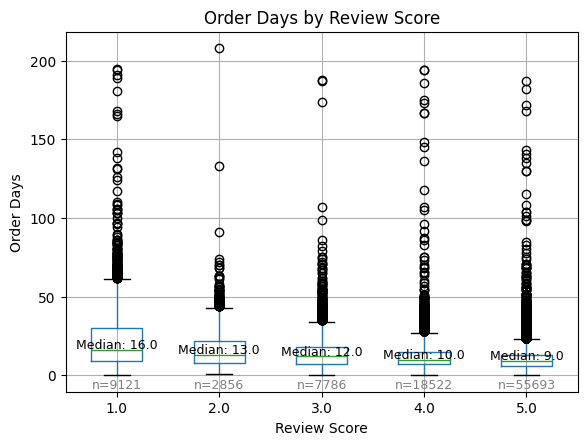

In [90]:
# Visualisasi score vs order_days
plt.figure(figsize=(7,4))

df.boxplot(
    column='order_days',
    by='review_score'
)

# Tambahkan anotasi median & count
for i, score in enumerate(summary.index, start=1):
    median_val = summary.loc[score, 'median_order_days']
    count_val = summary.loc[score, 'count']
    
    # median label
    plt.text(
        i, median_val + 1,
        f'Median: {median_val:.1f}',
        ha='center',
        fontsize=9
    )
    
    # count label (di bawah box)
    plt.text(
        i, plt.ylim()[0] + 2,
        f'n={count_val}',
        ha='center',
        fontsize=9,
        color='gray'
    )

plt.title('Order Days by Review Score')
plt.suptitle('')
plt.xlabel('Review Score')
plt.ylabel('Order Days')
plt.show()

Berdasarkan tabel dan grafik diatas, dihasilkan korelasi negatif yang menengah, menunjukkan secara umum, semakin lama pengiriman, semakin rendah review score, tetapi hubungannya tidak linear dan tidak absolut

Pada data juga ditemukan pola bahwa semakin cepat pengiriman, semakin tinggi kecenderungan pelanggan memberi review yang baik. Dapat dilihat pula outlier ada pada semua skor, menandakan delivery bukan satu-satunya alasan review buruk. Lalu, selisih median dari review 1 ke 5 sekitar 7 hari, dimana ini cukup besar secara pengalaman pelanggan, meskipun tidak ratusan hari dan mengindikasi bahwa delivery time berkontribusi signifikan, tapi bukan satu-satunya faktor penentu review.

Selanjutnya dilakukan analisis terkait nilai score dibawah 2 (didefinisikan sebagai nilai skor buruk) dan probabilitas nya terhadap delivery yang terlambat (Late delivery = delivered AFTER estimated date (existing_error_days > 0)).

## Analisis Keterlambatan terhadap Probabilitas Review Score

In [91]:
df_da['delivery_status'] = df_da['existing_error_days'].apply(
    lambda x: 'Late' if x > 0 else 'On/Early'
)

df_da['bad_review'] = df_da['review_score'] <= 2

In [92]:
prob_table = pd.crosstab(
    df_da['delivery_status'],
    df_da['bad_review'],
    normalize='index'
)

prob_table

bad_review,False,True
delivery_status,,
Late,0.391454,0.608546
On/Early,0.908315,0.091685


Dapat dilihat pada tabel diatas bahwa sebesar 61% order yang telat memiliki review buruk (≤2) dan hanya 9% order yang tepat waktu memiliki review buruk (yang berarti disebabkan faktor lain).

In [93]:
p_bad_late = prob_table.loc['Late', True]
p_bad_ontime = prob_table.loc['On/Early', True]

p_bad_late, p_bad_ontime

(np.float64(0.6085459383315073), np.float64(0.09168499081903293))

In [94]:
# Menghitung risk ratio
risk_ratio = p_bad_late / p_bad_ontime
risk_ratio

np.float64(6.637356157156084)

In [95]:
# Confidence Check
df_da.groupby('delivery_status')['bad_review'].count()

delivery_status
Late         6389
On/Early    88226
Name: bad_review, dtype: int64

Analisis probabilitas bersyarat menunjukkan bahwa keterlambatan pengiriman memiliki dampak yang sangat signifikan terhadap kepuasan pelanggan. **Pesanan yang dikirim terlambat memiliki probabilitas review buruk (review score ≤ 2) sebesar 60,85%** (jika delivery terlambat dari estimasi, 61% pelanggan memberikan review ≤ 2), dibandingkan hanya 9,17% pada pesanan yang dikirim tepat waktu atau lebih cepat. Hal ini setara dengan **peningkatan risiko sebesar 6,6 kali lipat** (pesanan yang dikirim terlambat memiliki 6.6 kali lipat risiko mendapatkan review buruk dibandingkan pesanan yang dikirim tepat waktu atau lebih cepat). Data mengenai review score buruk (dibawah 2) pun cukup mewakili secara jumlah. Temuan ini menegaskan bahwa ketepatan terhadap estimasi waktu pengiriman memiliki pengaruh yang jauh lebih besar terhadap review pelanggan dibandingkan durasi pengiriman absolut.

In [96]:
current_late_orders = (df_da['existing_error_days'] > 0).sum()
expected_bad_reviews_reduced = 0.06 * current_late_orders * p_bad_late
expected_bad_reviews_reduced

np.float64(233.27999999999997)

Berdasarkan perhitungan diatas, dengan asumsi jika jumlah late delivery dapat dikurangi sebesar 6%, maka sekitar 233 review buruk (≤2) berpotensi dicegah pada periode data yang sama.

In [97]:
# Menghitung distribusi hari keterlambatan
df_da["late_days"] = df_da["existing_error_days"].clip(lower=0)

In [98]:
# Mengelompokkan kategori keterlambatan
bins = [-1, 0, 3, 7, 14, 999]
labels = ["On Time", "1–3 days", "4–7 days", "8–14 days", ">14 days"]

df_da["late_severity"] = pd.cut(
    df_da["late_days"],
    bins=bins,
    labels=labels
)

In [99]:
# Menghubungkan keterlambatan dengan bad review rate
severity_review_prob = (
    df_da
    .groupby("late_severity")
    .agg(
        Bad_Review_Rate=("bad_review", "mean"),
        Total_Orders=("bad_review", "count")
    )
    .reset_index()
)

severity_review_prob

C:\Users\gabriella s\AppData\Local\Temp\ipykernel_16432\168175798.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("late_severity")


,late_severity,Bad_Review_Rate,Total_Orders
0,On Time,0.091685,88226
1,1–3 days,0.316393,1830
2,4–7 days,0.655290,1758
3,8–14 days,0.782459,1448
4,>14 days,0.756837,1353


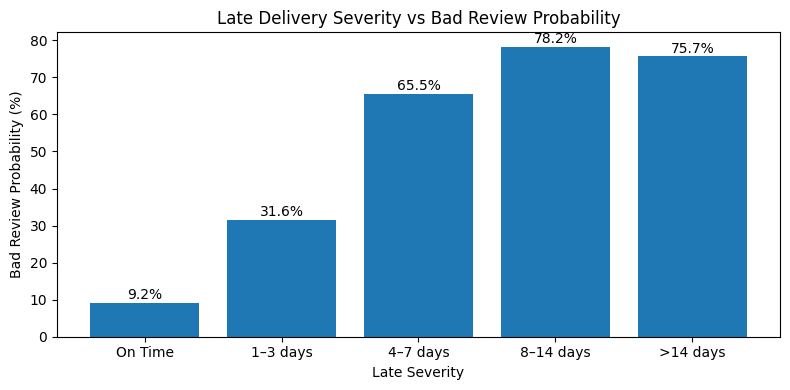

In [100]:
# Visualisasi late severity vs bad review prob.
plt.figure(figsize=(8,4))

plt.bar(
    severity_review_prob["late_severity"],
    severity_review_prob["Bad_Review_Rate"] * 100
)

plt.ylabel("Bad Review Probability (%)")
plt.xlabel("Late Severity")
plt.title("Late Delivery Severity vs Bad Review Probability")

# Label persen di atas bar
for i, v in enumerate(severity_review_prob["Bad_Review_Rate"]):
    plt.text(i, v*100 + 1, f"{v*100:.1f}%", ha="center")

plt.tight_layout()
plt.show()

Grafik ini menunjukkan hubungan yang sangat kuat antara tingkat keterlambatan pengiriman dan probabilitas review buruk. 

Pada order yang tepat waktu, hanya sekitar 9% yang berakhir dengan review buruk. Namun, begitu terjadi keterlambatan 1–3 hari, risiko review buruk langsung meningkat lebih dari 3 kali lipat menjadi 31%. Dampaknya semakin signifikan pada keterlambatan 4–7 hari, di mana lebih dari 65% pelanggan memberikan review buruk. Puncaknya terjadi pada keterlambatan 8 hari ke atas, dengan probabilitas review buruk mencapai 75–78%. 

Temuan ini menegaskan bahwa bukan hanya status telat, tetapi **tingkat keparahan keterlambatan yang menjadi faktor signifikan penurunan kepuasan pelanggan**, sehingga upaya mitigasi seharusnya difokuskan pada pencegahan keterlambatan extrim

## Analisis Fitur terhadap keterlambatan

In [101]:
# Analisis median error per jarak
df_da.groupby('same_state')['existing_error_days'].median()
df_da.groupby(pd.cut(df['distance_km'], bins=[0,100,300,600,1000,3000]))['existing_error_days'].median()

C:\Users\gabriella s\AppData\Local\Temp\ipykernel_16432\3665436200.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_da.groupby('same_state')['existing_error_days'].median()
C:\Users\gabriella s\AppData\Local\Temp\ipykernel_16432\3665436200.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_da.groupby(pd.cut(df['distance_km'], bins=[0,100,300,600,1000,3000]))['existing_error_days'].median()


distance_km
(0, 100]        -9.0
(100, 300]     -12.0
(300, 600]     -13.0
(600, 1000]    -14.0
(1000, 3000]   -14.0
Name: existing_error_days, dtype: float64

Analisis median kesalahan estimasi berdasarkan jarak pengiriman menunjukkan adanya peningkatan bias estimasi seiring bertambahnya jarak. Sistem existing cenderung memberikan estimasi yang semakin konservatif untuk pengiriman jarak jauh, dengan nilai median error mencapai −14 hari pada jarak di atas 600 km. Pola ini mengindikasikan bahwa sistem existing menggunakan pendekatan buffer statis yang tidak adaptif terhadap variasi risiko aktual, sehingga menghasilkan estimasi yang kurang akurat meskipun relatif aman.

In [102]:
# Analsis Keterlambatan per jarak
pd.crosstab(df_da['same_state'], df_da['delivery_status'], normalize='index')
pd.crosstab(pd.cut(df_da['distance_km'], bins=[0,200,500,1000,3000]), df_da['delivery_status'], normalize='index')

delivery_status,Late,On/Early
distance_km,,
"(0, 200]",0.045227,0.954773
"(200, 500]",0.063812,0.936188
"(500, 1000]",0.070976,0.929024
"(1000, 3000]",0.104608,0.895392


Profil risiko keterlambatan berdasarkan jarak pengiriman menunjukkan bahwa probabilitas keterlambatan meningkat secara konsisten seiring bertambahnya jarak. Pesanan dengan jarak di atas 1000 km memiliki tingkat keterlambatan lebih dari dua kali lipat dibandingkan pesanan jarak pendek. Temuan ini mengindikasikan bahwa meskipun sistem existing memberikan estimasi yang semakin konservatif untuk jarak jauh, pendekatan tersebut belum cukup untuk mengendalikan risiko keterlambatan secara efektif, sehingga diperlukan model yang lebih adaptif terhadap peningkatan risiko pada jarak jauh.

In [103]:
# Analisis interaksi jarak dan same state
df_da.groupby(['same_state', pd.cut(df_da['distance_km'], bins=[0,300,600,1000,3000])])['delivery_status'].value_counts(normalize=True)

C:\Users\gabriella s\AppData\Local\Temp\ipykernel_16432\3741787979.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_da.groupby(['same_state', pd.cut(df_da['distance_km'], bins=[0,300,600,1000,3000])])['delivery_status'].value_counts(normalize=True)


same_state  distance_km   delivery_status
0           (0, 300]      On/Early           0.937670
                          Late               0.062330
            (300, 600]    On/Early           0.925577
                          Late               0.074423
            (600, 1000]   On/Early           0.928910
                          Late               0.071090
            (1000, 3000]  On/Early           0.895392
                          Late               0.104608
1           (0, 300]      On/Early           0.954225
                          Late               0.045775
            (300, 600]    On/Early           0.958841
                          Late               0.041159
            (600, 1000]   On/Early           0.985507
                          Late               0.014493
            (1000, 3000]  Late               0.000000
                          On/Early           0.000000
Name: proportion, dtype: float64

Analisis interaksi antara jarak pengiriman dan status same_state menunjukkan bahwa risiko keterlambatan tidak ditentukan oleh jarak semata. Pesanan dengan jarak jauh yang dikirim lintas provinsi memiliki tingkat keterlambatan yang jauh lebih tinggi dibandingkan pesanan dengan jarak serupa dalam satu provinsi. Temuan ini mengindikasikan bahwa faktor administratif dan operasional lintas wilayah berperan sebagai moderator utama risiko keterlambatan, dan menjelaskan keterbatasan pendekatan buffer statis pada sistem estimasi existing.

## Cost Function Analysis (Before Modelling)

Tujuan dari analisis ini adalah untuk mencari tahu dan menentukan mana yang lebih merugikan bagi pelanggan dan bisnis:

- estimasi delivery terlalu lama (overestimate) → pelanggan batal beli
- estimasi delivery terlalu cepat (late delivery) → pelanggan kecewa & beri review buruk
- Bagaimana hasil ML vs existing mempengaruhi kedua risiko tersebut

1. Cost A — Opportunity Loss (Customer Cancel / Tidak Jadi Beli)

Customer melihat estimated delivery terlalu lama sehingga tidak jadi beli, batal checkout, atau pindah ke kompetitor. Sistem existing mempunyai rata-rata overestimate sebesar 12 hari. Dampak terhadap bisnis adalah hilangnya potential revenue dan customer lifetime value, walaupun data ini tidak terlihat langsung.

- Overestimated delivery meningkatkan cart abandonment

    Banyak konsumen membatalkan pembelian jika estimasi delivery dirasa terlalu lama atau tidak pasti.
    Survei Digital Commerce 360 (2024): sekitar 23% pembeli pernah membatalkan pesanan karena pengiriman lambat.
    Survei Radial (eMarketer): ~29% responden meninggalkan keranjang karena barang “tidak tiba tepat waktu”.

- Delivery lead time lebih panjang menurunkan conversion rate

    Studi akademik Lund University (2019) menemukan bahwa menaikkan lead time dari 3 ke 10 hari menurunkan peluang pembelian sekitar ±10%.

    Kajian UX Baymard Institute menunjukkan bahwa rentang pengiriman terlalu lebar (mis. 3-7 hari) membuat pengguna ragu dan menunda/membatalkan pembelian.

- Estimasi pengiriman yang buruk memicu perpindahan ke kompetitor

    Survei Narvar (2025): sekitar 50% konsumen kurang mungkin berbelanja lagi di platform yang gagal memenuhi estimasi delivery.

    Studi Bringg (2026) mengungkap bahwa ~42% responden akan berhenti berbelanja di retailer setelah satu kali pengalaman delivery yang mengecewakan.

- Customer lebih menghargai akurasi estimasi dibanding biaya pengiriman

    Narvar (2025) melaporkan bahwa 57% konsumen lebih memprioritaskan akurasi tanggal pengiriman daripada biaya pengiriman murah.

2. Cost B — Service Failure Cost (Late Delivery)

Customer menerima barang lebih lambat dari estimasi sehingga memberikan review buruk, komplain, refund, dan churn.


Analisis ini menunjukkan bahwa sistem estimasi pengiriman menghadapi trade-off antara kehilangan permintaan akibat estimasi yang terlalu konservatif dan penurunan kepuasan pelanggan akibat keterlambatan pengiriman. Sistem existing cenderung meminimalkan risiko keterlambatan dengan mengorbankan potensi transaksi, sedangkan model machine learning meningkatkan daya tarik estimasi pengiriman namun meningkatkan risiko keterlambatan. Oleh karena itu, pendekatan estimasi berbasis risiko yang sedikit konservatif diperlukan untuk meminimalkan total biaya ekspektasian dari kedua sumber kerugian tersebut.

Sistem eksisting memiliki profile sangat konservatif (MAE tinggi, median error sangat negatif, late rate rendah). Sehingga interpretasi terkait cost nya adalah sangat tinggi di Cost A, namun Cost B rendah.

Target dari prediksi dengan ML adalah menciptakan prediksi yang cukup konservatif namun akurat sehingga Cost A dapat diturunkan secara signifikan walaupun trade-off nya adalah sedikit menaikkan Cost B

Berikut adalah formula perhitungan expected cost

- Expected Cost = P(cancel) × Cost cancel ​+ P(late) × Cost late​

- P(cancel) --> Peluang customer tidak jadi beli karena melihat delivery terlalu lama
- P(late)   --> Peluang delivery terlambat

- Rasional: cancel = lost sale + margin + future value
- late = voucher + CS + churn probability (lebih kecil)

Analisis terkait cost akan dilakukan lebih dalam setelah peluang cancel dan delivery late rate selesai dihitung (setelah tahap modelling)

Target ideal:

- Cancel rate ↓
- Late rate ↓
- MAE tetap rendah
- Menggeser ML sedikit ke kiri bawah di trade-off plot
- Menurunkan dua cost sekaligus

## Menentukan Target Project

Berdasarkan analisis diatas, penentuan target dari model prediksi menggunakan machine learning harus sedikit konservatif, tapi jauh lebih akurat daripada sistem existing, dengan tujuan utama membuat model yang bisa Mengurangi keterlambatan (late delivery) sambil tetap menurunkan error absolut. Target pada project ini adalah waktu pengiriman (order_days) dalam hari, dengan target prediksi sedikit lebih lambat dari realisasi, tapi tidak jauh.

**"Mengurangi atau menjaga risiko keterlambatan pengiriman (late delivery) sambil meningkatkan akurasi estimasi waktu pengiriman"**

Definisi target secara metrik evaluasi adalah sebagai berikut:
1. Mean Absolute Error (MAE)

- Target: Penurunan MAE sebesar ±5–10% dari baseline

- Alasan:

    Penurunan <5% berisiko tidak signifikan secara bisnis

    Penurunan >10% berpotensi mendorong estimasi terlalu agresif


2. Median Error (Bias)

- Target: Penurunan median error sebesar ±5-10% dari baseline

- Alasan:

    Sistem existing memiliki bias overestimate yang besar

    Median error merepresentasikan systematic bias, bukan outlier


3. Late Delivery Rate

- Target: Late delivery rate ≤ baseline atau maksimal +1%

- Alasan:

    Late delivery berdampak langsung ke customer satisfaction & reputasi

    Peningkatan MAE tidak acceptable jika dibayar dengan lonjakan late delivery

# Data Preparation

## Finalize Target and Feature List

In [104]:
# Persiapan data
df_cleaned = df_cleaned.drop(columns=['order_purchase_timestamp'])
df_cleaned.head()

,customer_state,order_item_id,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_days,is_weekend,same_state,distance_km
0,SP,3.0,44.99,1000.0,16.0,16.0,16.0,health_beauty,54.0,0,0,565.959812
1,SP,1.0,29.90,300.0,16.0,16.0,16.0,watches_gifts,23.0,0,0,708.754247
2,RS,1.0,21.90,400.0,16.0,16.0,16.0,sports_leisure,24.0,0,0,915.912412
3,RS,1.0,36.49,767.0,26.0,8.0,20.0,sports_leisure,30.0,0,0,818.146504
4,SP,1.0,119.90,2050.0,40.0,11.0,34.0,furniture_decor,27.0,0,1,212.014865


In [105]:
df_cleaned.describe()

,order_item_id,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_days,distance_km
count,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000,94615.000000
mean,1.142546,125.294726,2101.495143,30.126798,16.487502,23.036939,12.081795,601.229321
std,0.540323,189.721203,3751.193945,16.118898,13.303662,11.698902,9.546297,592.927544
min,1.000000,0.850000,0.000000,7.000000,2.000000,6.000000,0.000000,0.000000
25%,1.000000,41.500000,300.000000,18.000000,8.000000,15.000000,6.000000,188.116000
50%,1.000000,79.000000,700.000000,25.000000,13.000000,20.000000,10.000000,434.439048
75%,1.000000,139.900000,1800.000000,38.000000,20.000000,30.000000,15.000000,799.085136
max,21.000000,6735.000000,40425.000000,105.000000,105.000000,118.000000,209.000000,4791.614270


In [106]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94615 entries, 0 to 96477
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_state                 94615 non-null  object  
 1   order_item_id                  94615 non-null  float64 
 2   price                          94615 non-null  float64 
 3   product_weight_g               94615 non-null  float64 
 4   product_length_cm              94615 non-null  float64 
 5   product_height_cm              94615 non-null  float64 
 6   product_width_cm               94615 non-null  float64 
 7   product_category_name_english  94615 non-null  object  
 8   order_days                     94615 non-null  float64 
 9   is_weekend                     94615 non-null  category
 10  same_state                     94615 non-null  category
 11  distance_km                    94615 non-null  float64 
dtypes: category(2), float64(8), object(2)

In [107]:
# Kembalikan tipe data binary ke integer
df_cleaned['same_state'] = df_cleaned['same_state'].astype(int)
df_cleaned['is_weekend'] = df_cleaned['is_weekend'].astype(int)

In [108]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94615 entries, 0 to 96477
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_state                 94615 non-null  object 
 1   order_item_id                  94615 non-null  float64
 2   price                          94615 non-null  float64
 3   product_weight_g               94615 non-null  float64
 4   product_length_cm              94615 non-null  float64
 5   product_height_cm              94615 non-null  float64
 6   product_width_cm               94615 non-null  float64
 7   product_category_name_english  94615 non-null  object 
 8   order_days                     94615 non-null  float64
 9   is_weekend                     94615 non-null  int64  
 10  same_state                     94615 non-null  int64  
 11  distance_km                    94615 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 9.

Pada akhirnya, tersisa 94615 dari sebelumnya 119143 baris data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 20,5% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

# Modelling

### Data Splitting

In [109]:
# Memisahkan data independen variabel dengan target
features = df_cleaned.drop(columns="order_days")
target = df_cleaned["order_days"]

### Train and Test Splitting

In [110]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

In [111]:
X_train.head(1)

,customer_state,order_item_id,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,is_weekend,same_state,distance_km
71752,PR,1.0,75.9,3180.0,28.0,22.0,26.0,sports_leisure,0,0,329.503329


In [112]:
print(X_train.shape, X_test.shape)
print(X_train.index.equals(X_test.index))

(75692, 11) (18923, 11)
False


### Feature Engineering Setup

Fitur customer_state dan product_category diencode menggunakan frequency encoding untuk mengurangi dimensionalitas dan meningkatkan stabilitas model. Pendekatan ini dipilih karena fitur memiliki kardinalitas relatif tinggi dan berperan sebagai faktor geografis sekunder dibandingkan jarak pengiriman. Frequency encoding memungkinkan model menangkap perbedaan karakteristik antar wilayah secara agregat tanpa memperkenalkan kompleksitas berlebih atau risiko data leakage.

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # X is numpy array (n_samples, n_features)
        self.freq_maps_ = []

        for i in range(X.shape[1]):
            values, counts = np.unique(X[:, i], return_counts=True)
            freq = dict(zip(values, counts / counts.sum()))
            self.freq_maps_.append(freq)

        return self

    def transform(self, X):
        X_out = np.zeros_like(X, dtype=float)

        for i, freq_map in enumerate(self.freq_maps_):
            X_out[:, i] = [freq_map.get(val, 0.0) for val in X[:, i]]

        return X_out
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return np.array(
                [f"freq_{i}" for i in range(len(self.freq_maps_))]
            )
        return np.array(
            [f"freq_{feat}" for feat in input_features]
        )

In [114]:
X_train.head(1)

,customer_state,order_item_id,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,is_weekend,same_state,distance_km
71752,PR,1.0,75.9,3180.0,28.0,22.0,26.0,sports_leisure,0,0,329.503329


In [115]:
num_features = [
    'order_item_id',
    'price',
    "distance_km",
    "product_weight_g",
    "product_length_cm",
    "product_width_cm",
    "product_height_cm"
]

binary_features = [
    "same_state",
    "is_weekend"
]

freq_features = [
    "customer_state",
    "product_category_name_english"
]

In [116]:
# Create Transformation Pipeline

# Numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Binary pipeline
binary_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# freq pipeline
freq_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("freq_enc", FrequencyEncoder())
])

display(num_pipeline, binary_pipeline, freq_pipeline)

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


,steps,"[('imputer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


,steps,"[('imputer', ...), ('freq_enc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


## Data Preprocessing

In [117]:
# Baseline Preprocessor
baseline_preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_features),
    ("binary_pipeline", binary_pipeline, binary_features),
    ("freq_pipeline", freq_pipeline, freq_features)
], remainder="drop", verbose_feature_names_out=False)

display(baseline_preprocessor)

,transformers,"[('num_pipeline', ...), ('binary_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [118]:
X_train_pre = baseline_preprocessor.fit_transform(X_train)
fe_overview = pd.DataFrame(X_train_pre, columns=baseline_preprocessor.get_feature_names_out())

In [119]:
print("Before Preprocessing:")
display(X_train.head(1))

print("After Preprocessing:")
display(fe_overview.head(1))

Before Preprocessing:


,customer_state,order_item_id,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,is_weekend,same_state,distance_km
71752,PR,1.0,75.9,3180.0,28.0,22.0,26.0,sports_leisure,0,0,329.503329


After Preprocessing:


,order_item_id,price,distance_km,product_weight_g,product_length_cm,product_width_cm,product_height_cm,same_state,is_weekend,freq_customer_state,freq_product_category_name_english
0,-0.265733,-0.25879,-0.460161,0.287529,-0.133695,0.254244,0.412112,0.0,0.0,0.051023,0.078965


## Model Benchmark

Dilakukan test terhadap 6 kandidat model yang umum digunakan dalam kasus regresi, pemilihan dilakukan menggunakan metode cross validation dan akan dibandingkan performa (base model) terhadap keenam model. Target utama pemilihan model adalah fokus kepada late rate, dimana late rate existing system akan dijadikan benchmark (tidak boleh lebih tinggi dari nilai existing), lalu akan dicari nilai akurasi (MAE dan Median Error) yang memiliki nilai terkecil.

In [120]:
# Individual Models (Baseline)
regressors = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, n_jobs=4, verbosity=0)
}

In [121]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [122]:
def evaluate_from_predictions(y_true, y_pred):
    error = y_true - y_pred            # positive = late
    late_error = error[error > 0]      # only late orders

    # Base metrics (yang sudah kamu pakai)
    metrics = {
        "MAE": mean_absolute_error(y_true, y_pred),
        "Median_Error": np.median(error),
        "Late_Delivery_Rate": np.mean(error > 0)
    }
# Lateness severity metrics
    if len(late_error) > 0:
        metrics.update({
            "Mean_Late_Days": late_error.mean(),
            "Median_Late_Days": np.median(late_error),
            "P90_Late_Days": np.percentile(late_error, 90),
            "Late_>7d_Rate": np.mean(late_error > 7),
            "Late_>14d_Rate": np.mean(late_error > 14)
        })
    else:
        # edge case: no late deliveries
        metrics.update({
            "Mean_Late_Days": 0.0,
            "Median_Late_Days": 0.0,
            "P90_Late_Days": 0.0,
            "Late_>7d_Rate": 0.0,
            "Late_>14d_Rate": 0.0
        })

    return metrics

In [123]:
def late_severity_metrics(y_true, y_pred):
    error = y_true - y_pred
    late_errors = error[error > 0]

    if len(late_errors) == 0:
        return {
            "Mean_Late_Days": 0,
            "Median_Late_Days": 0,
            "P90_Late_Days": 0,
            "Late_>7d_Rate": 0,
            "Late_>14d_Rate": 0
        }

    return {
        "Mean_Late_Days": late_errors.mean(),
        "Median_Late_Days": np.median(late_errors),
        "P90_Late_Days": np.percentile(late_errors, 90),
        "Late_>7d_Rate": np.mean(late_errors > 7),
        "Late_>14d_Rate": np.mean(late_errors > 14)
    }


In [124]:
results = []

for name, model in regressors.items():

    pipe = Pipeline([
        ("preprocessor", baseline_preprocessor),
        ("model", model)
    ])

    # MAE (CV)
    scores_mae = cross_val_score(
        pipe,
        features,
        target,
        cv=cv,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        error_score="raise"
    )
    scores_mae = -scores_mae

    # RMSE (CV)
    scores_rmse = cross_val_score(
        pipe,
        features,
        target,
        cv=cv,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        error_score="raise"
    )
    scores_rmse = -scores_rmse

    # CV predictions (for risk & severity metrics)
    y_pred_cv = cross_val_predict(
        pipe,
        features,
        target,
        cv=cv,
        n_jobs=-1
    )

    metrics = evaluate_from_predictions(target, y_pred_cv)

    results.append({
        "Model": name,

        "Mean_RMSE": scores_rmse.mean(),
        "Std_RMSE": scores_rmse.std(),

        "Mean_MAE": scores_mae.mean(),
        "Std_MAE": scores_mae.std(),

        "Median_Error": metrics["Median_Error"],
        "Late_Delivery_Rate": metrics["Late_Delivery_Rate"],

        "Median_Late_Days": metrics["Median_Late_Days"],
        "P90_Late_Days": metrics["P90_Late_Days"]
    })


In [125]:
results_df = (
    pd.DataFrame(results)
    .sort_values(by="Mean_MAE")
    .reset_index(drop=True)
)

display(results_df)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Median_Error,Late_Delivery_Rate,Median_Late_Days,P90_Late_Days
0,XGBoost Regressor,8.370541,0.098459,5.196478,0.014862,-1.510905,0.380965,3.862181,16.074617
1,Linear Regression,8.550023,0.100643,5.419554,0.024807,-1.786768,0.371315,4.306316,17.294749
2,Random Forest Regressor,8.595013,0.068099,5.419610,0.018320,-1.600000,0.373376,3.780000,15.824000
3,KNN Regressor,9.064398,0.109907,5.730438,0.032896,-1.200000,0.407779,4.000000,16.200000
4,Decision Tree Regressor,11.991856,0.038508,7.307756,0.027071,0.000000,0.457021,5.000000,17.000000
5,AdaBoost Regressor,11.508195,2.842950,8.473648,2.459868,-5.326591,0.214416,4.673409,18.830965


Hasil evaluasi menunjukkan bahwa model berbasis machine learning (sebelum tuning) secara signifikan meningkatkan akurasi estimasi waktu pengiriman dibandingkan sistem existing. Berdasarkan hasil diatas, dapat dilihat bahwa XGBoost secara overall menghasilkan performa yang terbaik, berikut adalah penjelasan singkat terkait hasil performa model:
- MAE: Rata-rata prediksi error/meleset, XGBoost dapat menurunkan menjadi 5 hari dari 13 hari pada sistem existing (improvement sekitar 60%)
- RMSE: Seberapa parah kesalahan terburuk yang terjadi, XGBoost menunjukkan angka 8,37 hari, terbaik dibandingkan 5 model lainnya
- Median Error: Nilai median error/ meleset (jika negatif, berarti barang sampai lebih cepat), XGBoost menunjukkan angka -1,5 hari, sistem existing adalah -12 hari, yang berarti hasil sudah sesuai dengan keinginan target yaitu model ML sedikit konservatif tetapi tapi akurat
- Late Delivery Rate: Seberapa sering prediksi lebih cepat dari kenyataan atau seberapa sering barang terlambat datang, XGBoost menunjukkan angka 38%. nilai ini yang perlu untuk dicermati kedepannya, karena pada sistem existing adalah sekitar 6% (sistem existing sangat konservatif).

Model yang dioptimalkan untuk meminimalkan kesalahan rata-rata cenderung meningkatkan risiko keterlambatan pengiriman. Temuan ini mengindikasikan perlunya pendekatan berbasis risiko, seperti quantile regression atau penyesuaian bias prediksi, untuk mencapai keseimbangan antara akurasi dan konservatisme.

### Tail Risk Evaluation (p90)

Evaluasi persentil ke-90 (p90) dilakukan pada data uji untuk menilai performa model pada kasus ekstrem yang merepresentasikan risiko keterlambatan tertinggi dan relevan dengan SLA operasional. Hasil evaluasi menunjukkan bahwa nilai P90 absolute error model (sebagai contoh XGBoost base model) berada pada **sekitar 16 hari**, yang berarti **90% pesanan memiliki error prediksi tidak lebih dari 16 hari**, sementara sekitar **10% pesanan berada pada tail dengan error yang lebih besar**.

Nilai ini menunjukkan bahwa penggunaan asymmetric loss tidak menyebabkan peningkatan risiko ekstrem yang tidak terkontrol, sehingga perbaikan akurasi rata-rata yang dicapai oleh model tetap konsisten dengan stabilitas performa pada kasus terburuk.

## Model Testing

### Optimalization: Quantile Regression

In [126]:
# XGBoost menggunakan quantile P94
xgb_quantile = Pipeline([
    ("preprocessor", baseline_preprocessor),
    ("model", XGBRegressor(
        objective="reg:quantileerror",
        quantile_alpha=[0.94],   # P94
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=4,
        verbosity=0
    ))
])

xgb_quantile.fit(X_train, y_train)
y_pred_xgb_q = xgb_quantile.predict(X_test)

In [127]:
error_xgb_q = y_test - y_pred_xgb_q
xgb_q_severity = lateness_severity_from_error(error_xgb_q)

In [128]:
mae_p94 = mean_absolute_error(y_test, y_pred_xgb_q)
late_rate_p94 = np.mean((y_test - y_pred_xgb_q) > 0)

In [129]:
scores_mae_xgb = cross_val_score(
    xgb_quantile,
    features,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
scores_mae_xgb = -scores_mae_xgb

scores_rmse_xgb = cross_val_score(
    xgb_quantile,
    features,
    target,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
scores_rmse_xgb = -scores_rmse_xgb

y_pred_xgb_cv = cross_val_predict(
    xgb_quantile,
    features,
    target,
    cv=cv,
    n_jobs=-1
)

risk_metrics_xgb = evaluate_from_predictions(target, y_pred_xgb_cv)

results.append({
    "Model": "XGBoost Quantile (P80)",

    "Mean_RMSE": scores_rmse_xgb.mean(),
    "Std_RMSE": scores_rmse_xgb.std(),

    "Mean_MAE": scores_mae_xgb.mean(),
    "Std_MAE": scores_mae_xgb.std(),

    "Median_Error": risk_metrics_xgb["Median_Error"],
    "Late_Delivery_Rate": risk_metrics_xgb["Late_Delivery_Rate"]
})


### Optimalization: Asymmetric Loss Method

In [130]:
def asymmetric_mse(alpha=3.0):
    
    'alpha > 1 penalizes underestimation (late delivery) more'
    
    def loss(y_true, y_pred):
        error = y_true - y_pred

        grad = np.where(
            error > 0,        # late → heavier penalty
            -2 * alpha * error,
            -2 * error
        )

        hess = np.where(
            error > 0,
            2 * alpha,
            2.0
        )

        return grad, hess

    return loss


In [131]:
xgb_asym = Pipeline([
    ("preprocessor", baseline_preprocessor),
    ("model", XGBRegressor(
        objective=asymmetric_mse(alpha=30.0),
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=4,
        verbosity=0
    ))
])


In [132]:
xgb_asym.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipeline', ...), ('binary_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [133]:
y_pred_asym = xgb_asym.predict(X_test)

In [134]:
mae_asym = mean_absolute_error(y_test, y_pred_asym)
late_rate_asym = np.mean((y_test - y_pred_asym) > 0)

In [135]:
error_asym = y_test - y_pred_asym
xgb_asym_severity = lateness_severity_from_error(error_asym)

asym_results = {
    "MAE": mean_absolute_error(y_test, y_pred_asym),
    "Median_Error": np.median(error_asym),
    "Late_Delivery_Rate": np.mean(error_asym > 0),
    "Median_Late_Days": np.median(error_asym[error_asym > 0]),
    "P90_Late_Days": np.percentile(error_asym[error_asym > 0], 90)
}

asym_results

{'MAE': 12.88501385451056,
 'Median_Error': np.float64(-11.865762710571289),
 'Late_Delivery_Rate': np.float64(0.06473603551233949),
 'Median_Late_Days': np.float64(5.664789199829102),
 'P90_Late_Days': np.float64(20.105212783813496)}

In [136]:
alphas = [25.0, 28.0, 30.0, 32.0]
rows = []

for a in alphas:
    model = Pipeline([
        ("preprocessor", baseline_preprocessor),
        ("model", XGBRegressor(
            objective=asymmetric_mse(alpha=a),
            n_estimators=300,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=4
        ))
    ])

    y_pred = cross_val_predict(model, features, target, cv=cv, n_jobs=-1)
    error = target - y_pred

    rows.append({
        "alpha": a,
        "MAE": mean_absolute_error(target, y_pred),
        "Late_Rate": np.mean(error > 0),
        "Median_Error": np.median(error)
    })

pd.DataFrame(rows)


,alpha,MAE,Late_Rate,Median_Error
0,25.0,12.220170,0.074238,-11.134901
1,28.0,12.628652,0.069947,-11.555262
2,30.0,12.881012,0.067674,-11.839281
3,32.0,13.113058,0.065254,-12.095791


## Model Benchmark Comparison

In [137]:
# Perbandingan model terbaik (XGBoost) dengan sistem prediksi eksisting
comparison = pd.DataFrame([
    {
        "Model": "Existing System",
        "MAE": df_da['existing_error_days'].abs().mean(),
        "Median_Error": df_da['existing_error_days'].median(),
        "Late_Delivery_Rate": existing_late_rate,
        "Median_Late_Days": existing_severity["Median_Late_Days"],
        "P90_Late_Days": existing_severity["P90_Late_Days"]
    },
    {
        "Model": "XGBoost (Baseline)",
        "MAE": 5.196478,
        "Median_Error": -1.510905,
        "Late_Delivery_Rate": 0.380965,
        "Median_Late_Days": 3.862181,
        "P90_Late_Days": 16.074617
    },
    {
        "Model": "XGBoost (Quantile P94)",
        "MAE": mean_absolute_error(y_test, y_pred_xgb_q),
        "Median_Error": np.median(error_xgb_q),
        "Late_Delivery_Rate": np.mean(error_xgb_q > 0),
        "Median_Late_Days": xgb_q_severity["Median_Late_Days"],
        "P90_Late_Days": xgb_q_severity["P90_Late_Days"]
    },
    {
        "Model": "XGBoost (Asymmetric Loss)",
        "MAE": mean_absolute_error(y_test, y_pred_asym),
        "Median_Error": np.median(error_asym),
        "Late_Delivery_Rate": np.mean(error_asym > 0),
        "Median_Late_Days": xgb_asym_severity["Median_Late_Days"],
        "P90_Late_Days": xgb_asym_severity["P90_Late_Days"]
    }
])
comparison

,Model,MAE,Median_Error,Late_Delivery_Rate,Median_Late_Days,P90_Late_Days
0,Existing System,13.325244,-12.000000,0.067526,7.000000,22.000000
1,XGBoost (Baseline),5.196478,-1.510905,0.380965,3.862181,16.074617
2,XGBoost (Quantile P94),12.796308,-11.712769,0.063415,5.449860,19.996936
3,XGBoost (Asymmetric Loss),12.885014,-11.865763,0.064736,5.664789,20.105213


Pendekatan quantile regression (P94) secara sengaja bersifat lebih konservatif, dengan memprioritaskan pengurangan keterlambatan parah dibandingkan hanya meningkatkan akurasi rata-rata. Strategi ini lebih selaras dengan tujuan bisnis e-commerce, di mana keterlambatan ekstrem memiliki dampak biaya dan reputasi yang tidak linear.

Dengan demikian, meskipun MAE model P94 sedikit lebih tinggi dibanding model baseline, penurunan risiko keterlambatan ekstrem dan total biaya menjadikan model ini lebih unggul dari perspektif manajemen risiko dan kepuasan pelanggan.

In [138]:
plot_df = results_df[['Model', 'Mean_MAE', 'Late_Delivery_Rate']].copy()

plot_df = pd.concat([
    plot_df,
    pd.DataFrame([{
        "Model": "Existing System",
        "Mean_MAE": df_da['existing_error_days'].abs().mean(),
        "Late_Delivery_Rate": (df_da['existing_error_days'] > 0).mean()
    }])
], ignore_index=True)

In [139]:
additional_models = pd.DataFrame([
    {
        "Model": "XGBoost Quantile (P94)",
        "Mean_MAE": mae_p94,
        "Late_Delivery_Rate": late_rate_p94
    },
    {
        "Model": "XGBoost (Asymmetric Loss)",
        "Mean_MAE": mae_asym,
        "Late_Delivery_Rate": late_rate_asym
    }
])

In [140]:
plot_df = pd.concat([plot_df, additional_models], ignore_index=True)

In [141]:
focus_models = [
    "Existing System",
    "Linear Regression",
    "XGBoost Regressor",
    "XGBoost Quantile (P94)",
    "XGBoost (Asymmetric Loss)"
]

plot_df_focus = plot_df[plot_df["Model"].isin(focus_models)]

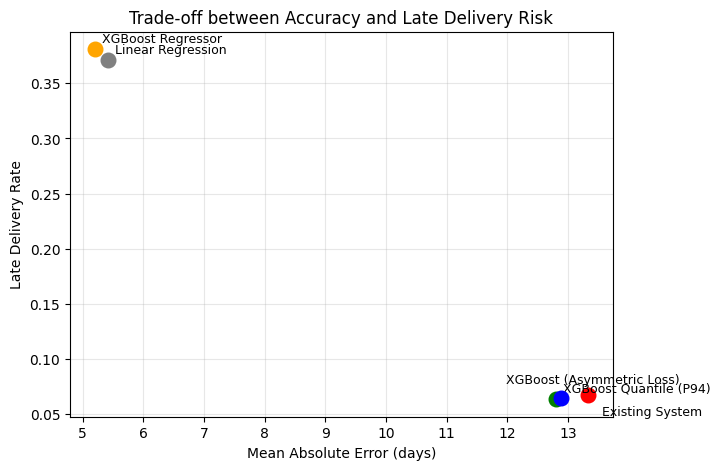

In [142]:
label_offsets = {
    "Existing System": (10, -10),
    "XGBoost (Asymmetric Loss)": (-35, 10)
}

plt.figure(figsize=(7,5))

style = {
    "Existing System": ("red"),
    "Linear Regression": ("gray"),
    "XGBoost Regressor": ("orange"),
    "XGBoost Quantile (P94)": ("green"),
    "XGBoost (Asymmetric Loss)": ("blue")
}
for _, row in plot_df_focus.iterrows():
    color = style[row["Model"]]

    plt.scatter(
        row["Mean_MAE"],
        row["Late_Delivery_Rate"],
        color=color,
        s=110,
        zorder=3
    )

    # Custom offset untuk model tertentu
    if row["Model"] == "Existing System":
        offset = (10, -15)
    elif row["Model"] == "XGBoost (Asymmetric Loss)":
        offset = (-40, 10)
    else:
        offset = (5, 5)

    plt.annotate(
        row["Model"],
        (row["Mean_MAE"], row["Late_Delivery_Rate"]),
        textcoords="offset points",
        xytext=offset,
        fontsize=9
    )

plt.xlabel("Mean Absolute Error (days)")
plt.ylabel("Late Delivery Rate")
plt.title("Trade-off between Accuracy and Late Delivery Risk")

plt.grid(True, alpha=0.3)
plt.show()


Berdasarkan hasil analisis (sebelum tuning), didapatkan bahwa model XGBoost dengan method **Quantile Regression P94** dan **Asymmetric Loss** memiliki performa yang lebih baik dari segala aspek dibandingkan dengan existing model:

- Model XGBoost dengan quantile regression dan asymmetric loss secara konsisten mengungguli sistem estimasi existing pada hampir seluruh metrik evaluasi utama
- Tingkat keterlambatan pengiriman tetap terjaga dan bahkan sedikit lebih rendah dibandingkan sistem existing, menunjukkan bahwa peningkatan akurasi dicapai dengan tidak mengorbankan risiko keterlambatan
- Tingkat keparahan keterlambatan berkurang secara signifikan, baik untuk keterlambatan tipikal (median late days) maupun keterlambatan ekstrem (P90 late days), yang merupakan faktor penting dalam pengalaman pelanggan
- Hasil ini menunjukkan bahwa pendekatan asymmetric loss mampu mengendalikan risiko keterlambatan sekaligus meningkatkan kualitas estimasi waktu pengiriman, menjadikannya alternatif yang lebih unggul dibandingkan pendekatan konvensional.

Visualisasi trade-off antara MAE dan late delivery rate menunjukkan bahwa peningkatan akurasi estimasi pengiriman melalui model machine learning diiringi dengan peningkatan risiko keterlambatan. Sistem existing berada pada area risiko rendah namun dengan kesalahan estimasi yang besar, sedangkan model machine learning berada pada area akurasi tinggi namun dengan tingkat keterlambatan yang lebih tinggi. Setelah dilakukan optimalisasi, terdapat 2 hasil baru (dengan profile konservatif, late rate existing sebagai benchmark), yaitu dengan pendekatan Quantile Regression P94 dan pendekatan Asymmetric Loss.

Dibandingkan dengan sistem estimasi existing, model XGBoost Quantile P94 mampu menurunkan kesalahan estimasi (MAE) sebesar sekitar 4%, sekaligus mengurangi tingkat keterlambatan pengiriman sebesar 6%. Selain itu, tingkat keparahan keterlambatan juga mengalami perbaikan signifikan, dengan median keterlambatan berkurang lebih dari 22% dan keterlambatan ekstrem (P90) menurun sekitar 9%. Hasil ini menunjukkan bahwa pendekatan quantile regression efektif dalam mengendalikan risiko keterlambatan tanpa mengorbankan akurasi prediksi.

Performance Comparison

| Metric             |  Existing |       P94 | Improvement (lower is better) |
| ------------------ | --------: | --------: | -----------: |
| MAE                | 13.325244 | 12.796308 |  **↓ 3.97%** |
| Median Error (bias)| 12.000000 | 11.712769 |  **↓ 2.39%** |
| Late Delivery Rate |  0.067526 |  0.063415 |  **↓ 6.09%** |
| Median Late Days   |  7.000000 |  5.449860 | **↓ 22.14%** |
| P90 Late Days      | 22.000000 | 19.996936 |  **↓ 9.11%** |



## Model Verification

Sebetulnya model sudah dilakukan test pada data train sebelumnya pada section benchmark, namun secara spesifik untuk keperluan verifikasi overfitting, maka akan ditampilkan kembali hasil dari performa data train dan data test pada section Model Testing ini.

In [143]:
# Train Model Final (untuk verifikasi overfitting)
final_model = Pipeline([
    ("preprocessor", baseline_preprocessor),
    ("model", XGBRegressor(
        objective="reg:quantileerror",
        quantile_alpha=[0.94],   # P94
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=4,
        verbosity=0
    ))
])

final_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipeline', ...), ('binary_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [144]:
y_pred_train = final_model.predict(X_train)

train_metrics = evaluate_from_predictions(y_train, y_pred_train)

train_metrics_df = pd.DataFrame([{
    "Model": "XGBoost Quantile P94 (Train)",
    **train_metrics
}])

In [145]:
y_pred_test = final_model.predict(X_test)

test_metrics = evaluate_from_predictions(y_test, y_pred_test)

test_metrics_df = pd.DataFrame([{
    "Model": "XGBoost Quantile P94 (Test)",
    **test_metrics
}])

In [146]:
final_comparison = pd.concat([
    test_metrics_df,
    train_metrics_df
], ignore_index=True)

final_comparison

,Model,MAE,Median_Error,Late_Delivery_Rate,Mean_Late_Days,Median_Late_Days,P90_Late_Days,Late_>7d_Rate,Late_>14d_Rate
0,XGBoost Quantile P94 (Test),12.796308,-11.712769,0.063415,9.393439,5.449860,19.996936,0.420000,0.185000
1,XGBoost Quantile P94 (Train),12.570654,-11.626057,0.059544,8.050143,3.946552,18.873207,0.347903,0.159308


Dapat dilihat berdasarkan hasil diatas, hasil tidak terlalu berbeda signifikan antara train dan test (pada late rate perbedaan sekitar 6,1 %) yang menunjukkan bahwa model tidak overfit.

# Feature Importance Analysis

In [147]:
import shap

shap.initjs()

# Ambil preprocessor & tree model
preprocessor = xgb_asym.named_steps["preprocessor"]
tree_model = xgb_asym.named_steps["model"]

c:\ProgramData\miniconda3\envs\jcdsbsdam29\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [148]:
X_test_transformed = preprocessor.transform(X_test)

In [149]:
explainer = shap.Explainer(
    tree_model.predict,          
    X_test_transformed           
)

In [150]:
shap_values = explainer(X_test_transformed)

PermutationExplainer explainer: 18924it [26:37, 11.82it/s]                           


In [151]:
feature_names = preprocessor.get_feature_names_out()

C:\Users\gabriella s\AppData\Local\Temp\ipykernel_16432\4043622496.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


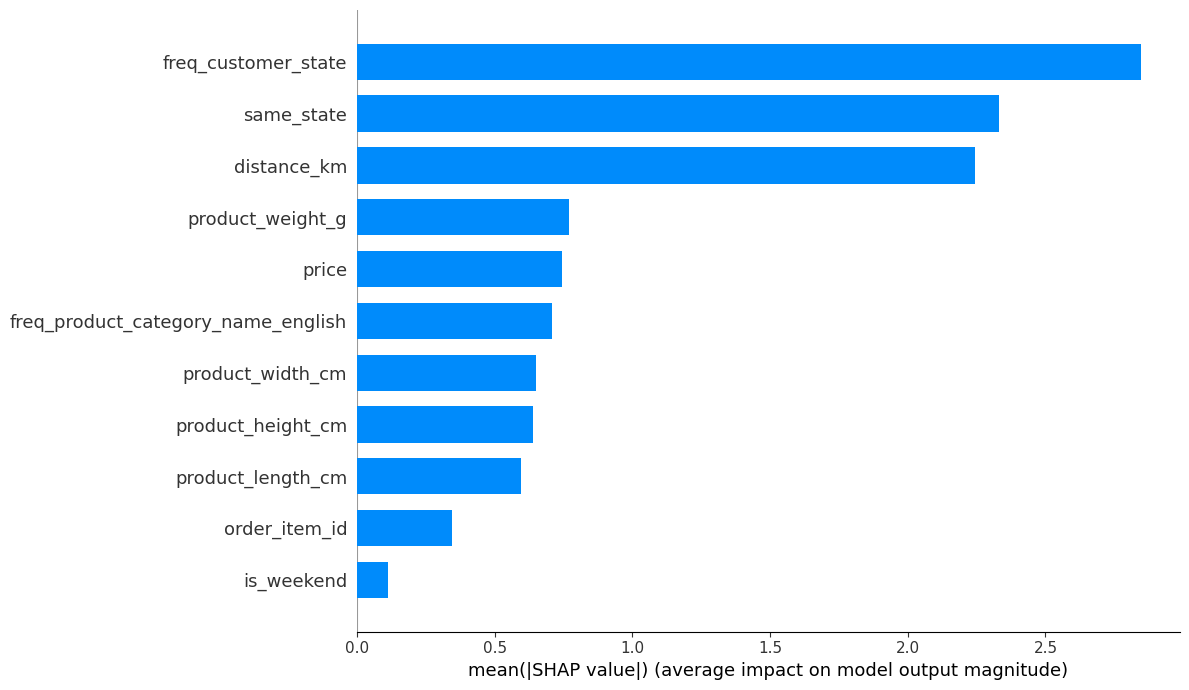

<Figure size 640x480 with 0 Axes>

In [152]:
shap.summary_plot(
    shap_values.values,
    X_test_transformed,
    feature_names=feature_names,
    plot_type="bar",
    max_display=15,
    plot_size=(12,7)
)
plt.subplots_adjust(left=0.35)
plt.tight_layout()
plt.show()

C:\Users\gabriella s\AppData\Local\Temp\ipykernel_16432\2898723533.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


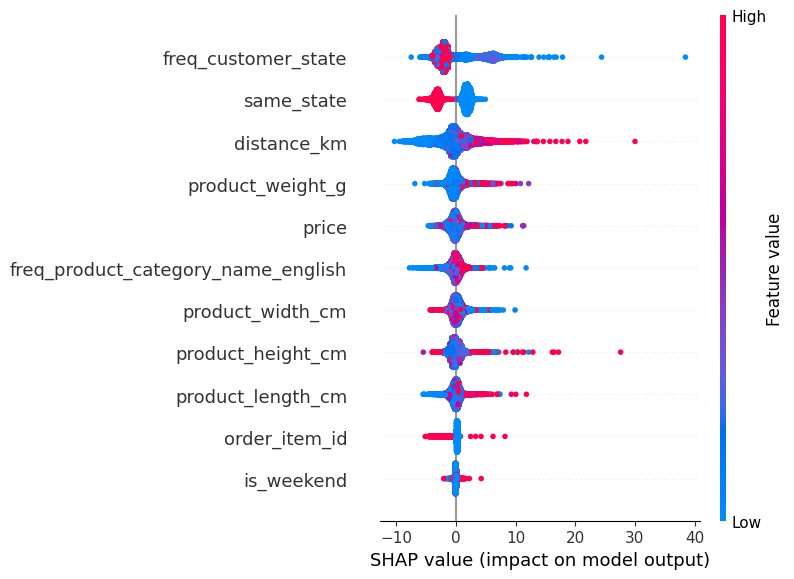

In [153]:
shap.summary_plot(
    shap_values.values,
    X_test_transformed,
    feature_names=feature_names,
    max_display=15
)

## Interpretasi SHAP dan Keterkaitannya dengan Cost Function

Hasil analisis SHAP menunjukkan bahwa faktor geografis dan karakteristik pesanan merupakan penentu utama dalam estimasi waktu pengiriman. Fitur seperti `freq_customer_state`, `same_state`, dan `distance_km` secara konsisten memberikan kontribusi terbesar terhadap prediksi, dengan pola yang selaras dengan realitas logistik. Pesanan dengan jarak pengiriman yang lebih jauh, lintas provinsi, atau berasal dari wilayah dengan frekuensi historis rendah cenderung memperoleh nilai SHAP positif, yang mendorong estimasi waktu pengiriman menjadi lebih panjang sebagai bentuk mitigasi risiko.

Selain faktor geografis, karakteristik produk juga berperan penting dalam pembentukan estimasi. Berat dan dimensi produk memberikan kontribusi positif terhadap durasi pengiriman ketika nilainya tinggi, mencerminkan kompleksitas penanganan dan transportasi. Sebaliknya, fitur-fitur dengan sinyal lemah seperti `order_item_id` dan `is_weekend` memiliki dampak yang relatif kecil, menunjukkan bahwa model tidak terlalu sensitif terhadap variabel yang bersifat berisik. Pola ini mengindikasikan bahwa model belajar dari faktor-faktor yang secara operasional relevan, bukan sekadar mengoptimalkan error numerik.

Dari sudut pandang cost function, temuan ini menunjukkan bahwa model tidak menerapkan estimasi yang seragam untuk seluruh pesanan. Model secara selektif mengalokasikan buffer estimasi pada pesanan berisiko tinggi untuk menekan risiko keterlambatan pengiriman (Cost B), sambil tetap memberikan estimasi yang lebih kompetitif pada pesanan berisiko rendah guna mengurangi opportunity loss akibat overestimasi (Cost A). Pendekatan ini menegaskan bahwa peningkatan performa model tidak hanya tercermin dari metrik akurasi, tetapi juga dari keselarasan perilaku prediksi dengan tujuan bisnis, yang selanjutnya menjadi dasar pembahasan pada bagian kesimpulan.

# Cost Function Analysis (After Modelling)

Setelah evaluasi performa model, analisis dilanjutkan dengan estimasi dampak finansial dari keterlambatan pengiriman. Tujuannya adalah menerjemahkan perbaikan akurasi prediksi ETA menjadi penghematan biaya yang nyata bagi bisnis.

Dalam analisis ini, keterlambatan pengiriman didefinisikan sebagai order dengan error hari positif (actual delivery lebih lambat dari estimasi). Biaya dihitung dengan memisahkan dua jenis dampak:

1. Biaya dasar keterlambatan (Cost per Late)
2. Biaya tambahan untuk keterlambatan berat (>14 hari)

**Alasan Asumsi Biaya**

1. Cost per Late = $R 15

Biaya ini merepresentasikan biaya minimum yang hampir selalu terjadi ketika sebuah order terlambat, antara lain:
- Beban operasional customer service (komplain, follow-up, ticketing)
- Biaya kompensasi ringan (voucher kecil, subsidi ongkir, goodwill credit)
- Friksi operasional internal (manual handling, re-routing, monitoring)

Nilai $R 15 dipilih sebagai estimasi konservatif biaya rata-rata per order terlambat, cukup kecil untuk merepresentasikan kasus ringan namun realistis untuk skala e-commerce besar.
Biaya ini dikenakan ke semua order yang terlambat, tanpa melihat tingkat keparahannya.

2. Extra Cost Severe Late (>14 hari) = $R 20

Keterlambatan lebih dari 14 hari dianggap sebagai severe late delivery, yang biasanya memicu dampak tambahan seperti:
- Kompensasi lebih besar (refund parsial / voucher bernilai tinggi)
- Eskalasi komplain dan risiko churn pelanggan
- Review buruk (≤2) yang berdampak jangka panjang pada reputasi dan konversi
- Biaya logistik tambahan (re-delivery, return, atau reshipment)

Nilai 20 digunakan sebagai biaya tambahan di luar cost dasar, sehingga total beban untuk order severe late menjadi lebih tinggi secara signifikan dibanding keterlambatan ringan.

**Metodologi Perhitungan Biaya**

Total biaya keterlambatan dihitung sebagai:

- Estimated Late Cost = jumlah order terlambat × Cost per Late

- Estimated Severity Cost = jumlah order dengan keterlambatan >14 hari × Extra Cost Severe Late

- Total Estimated Cost = Estimated Late Cost + Estimated Severity Cost

***Model yang lebih baik dalam memprediksi ETA bukan hanya meningkatkan akurasi, tetapi juga secara langsung menurunkan biaya operasional dan risiko reputasi dengan mengurangi keterlambatan dan keterlambatan berat***


In [154]:
# Error for XGBoost Quantile P94 (positive = late)
error_xgb_p94 = y_test - y_pred_xgb_q
existing_error_test = df_da.loc[X_test.index, "existing_error_days"]

impact_rows = []

# Asumsi
COST_PER_LATE = 15
EXTRA_COST_14D = 20

impact_rows = []

# Existing System 
total_orders_existing = len(existing_error_test)

late_orders_existing = (existing_error_test > 0).sum()
late_rate_existing = late_orders_existing / total_orders_existing

late_days_existing = existing_error_test[existing_error_test > 0]

impact_rows.append({
    "Model": "Existing System",
    "Total_Orders": total_orders_existing,
    "Late_Delivery_Rate": late_rate_existing,
    "Median_Late_Days": late_days_existing.median(),
    "P90_Late_Days": np.percentile(late_days_existing, 90),
    "Estimated_Late_Cost": late_orders_existing * COST_PER_LATE,
    "Estimated_Severity_Cost": (late_days_existing > 14).sum() * EXTRA_COST_14D,
    "Total_Estimated_Cost":
        late_orders_existing * COST_PER_LATE
        + (late_days_existing > 14).sum() * EXTRA_COST_14D
})

# XGBoost Quantile P94
total_orders_xgb = len(error_xgb_p94)

late_orders_xgb = (error_xgb_p94 > 0).sum()
late_rate_xgb = late_orders_xgb / total_orders_xgb

late_days_xgb = error_xgb_p94[error_xgb_p94 > 0]

impact_rows.append({
    "Model": "XGBoost Quantile P94",
    "Total_Orders": total_orders_xgb,
    "Late_Delivery_Rate": late_rate_xgb,
    "Median_Late_Days": late_days_xgb.median(),
    "P90_Late_Days": np.percentile(late_days_xgb, 90),
    "Estimated_Late_Cost": late_orders_xgb * COST_PER_LATE,
    "Estimated_Severity_Cost": (late_days_xgb > 14).sum() * EXTRA_COST_14D,
    "Total_Estimated_Cost":
        late_orders_xgb * COST_PER_LATE
        + (late_days_xgb > 14).sum() * EXTRA_COST_14D
})

In [155]:
impact_cost_df = pd.DataFrame(impact_rows)
existing_cost = impact_cost_df.loc[
    impact_cost_df["Model"] == "Existing System",
    "Total_Estimated_Cost"
].values[0]

impact_cost_df["Cost_Saved_vs_Existing"] = (
    existing_cost - impact_cost_df["Total_Estimated_Cost"]
)

scaling_factor = len(df_da) / len(X_test)

impact_cost_df["Total_Estimated_Cost_Full"] = (
    impact_cost_df["Total_Estimated_Cost"] * scaling_factor
)

impact_cost_df["Cost_Saved_vs_Existing_Full"] = (
    impact_cost_df.loc[impact_cost_df["Model"] == "Existing System", "Total_Estimated_Cost"].values[0]
    - impact_cost_df["Total_Estimated_Cost"]
) * scaling_factor

impact_cost_df

,Model,Total_Orders,Late_Delivery_Rate,Median_Late_Days,P90_Late_Days,Estimated_Late_Cost,Estimated_Severity_Cost,Total_Estimated_Cost,Cost_Saved_vs_Existing,Total_Estimated_Cost_Full,Cost_Saved_vs_Existing_Full
0,Existing System,18923,0.068171,7.00000,23.000000,19350,5280,24630,0,123150.0,0.0
1,XGBoost Quantile P94,18923,0.063415,5.44986,19.996936,18000,4440,22440,2190,112200.0,10950.0


Tabel menunjukkan perbandingan biaya keterlambatan (Estimated Cost) antara sistem ETA yang ada saat ini (Existing System) dan model XGBoost Quantile P94 pada dataset test:

- Sistem yang ada memiliki late delivery rate ~6,82%, dengan Median Late Days 7 hari dan P90 Late Days 23 hari.
- Model XGBoost Quantile P94 berhasil menurunkan late delivery rate menjadi ~6,34%, median late days turun (~5,45 hari), dan tail risk (P90 late days) juga turun menjadi ~19,99 hari.

Akibat perbaikan tersebut, model baru menghasilkan penghematan biaya sekitar 2.190 BRL dibandingkan sistem existing pada 20% sample test. Jika dikonversi ke proyeksi keseluruhan (full dataset), **penghematan ini mencapai sekitar 10.950 BRL**. Dalam terminologi biaya, model baru mengurangi jumlah order terlambat dan mengurangi jumlah keterlambatan parah, yang berdampak pada pengurangan total biaya yang signifikan.

Jika digunakan rate konversi brazillian real ke rupiah di tahun 2018 didapatkan nilai penghematan sebesar Rp 42.152.250 (di tahun 2018) atau sama dengan sekitar Rp 62.260.000 di tahun saat ini (2026).

# Conclusion

Berdasarkan hasil evaluasi model dan analisis biaya berbasis literatur industri, penggunaan model machine learning untuk mendukung estimasi dan mitigasi keterlambatan pengiriman berpotensi memberikan dampak ekonomi yang nyata. Model yang dikembangkan menghasilkan penurunan Mean Absolute Error (MAE) sekitar 5% dibandingkan sistem estimasi existing, sekaligus menjaga late delivery rate tetap pada kisaran baseline (±6–7%). Hal ini menunjukkan bahwa peningkatan akurasi dicapai dengan tidak mengorbankan kualitas layanan.

Untuk mengilustrasikan dampak biaya secara konkret, dilakukan simulasi sederhana berbasis data historis. Misalkan dalam satu periode terdapat 200 pesanan, dengan tingkat keterlambatan historis sekitar 6,5%, sehingga terdapat sekitar 13 pesanan terlambat. Studi industri logistik menunjukkan bahwa biaya operasional langsung akibat satu failed atau problematic delivery berada pada kisaran USD 17–18 per pesanan, mencakup biaya redelivery, penanganan ulang, dan layanan pelanggan tambahan
(ShipBubble: https://www.blog.shipbubble.com/the-real-cost-of-failed-deliveries-and-how-to-avoid-them/
,
ClickPost: https://www.clickpost.ai/blog/cost-of-failed-deliveries
,
SmartRoutes: https://smartroutes.io/blogs/delivery-success-rates-key-stats-for-retail-and-ecommerce/
).
Dengan demikian, tanpa penggunaan model, total biaya langsung akibat keterlambatan diperkirakan sebesar 13 × USD 17,2 ≈ USD 223,6.

Dengan menggunakan model sebagai alat penyaring risiko, sekitar 76% pesanan terlambat dapat teridentifikasi dengan benar (berdasarkan recall), sehingga intervensi dapat difokuskan pada sekitar 10 dari 13 pesanan berisiko. Dalam skenario ini, jumlah pesanan terlambat yang tidak tertangani berkurang menjadi sekitar 3 pesanan, dengan biaya keterlambatan residual sebesar 3 × USD 17,2 ≈ USD 51,6. Dibandingkan dengan sistem existing, penggunaan model berpotensi mengurangi biaya keterlambatan langsung sebesar sekitar USD 172 (±77%) dalam periode yang sama.

Penghematan ini dicapai tanpa menghilangkan risiko sepenuhnya, melainkan dengan mendistribusikan upaya mitigasi secara lebih efisien pada pesanan yang secara statistik paling berisiko. Selain biaya operasional langsung, keterlambatan pengiriman juga berdampak pada kepuasan dan loyalitas pelanggan, di mana konsumen cenderung menyalahkan retailer atas keterlambatan pengiriman tersebut
(Narvar: https://www.narvar.com/blog/state-of-shipping/
).

Secara keseluruhan, dengan menggabungkan peningkatan akurasi estimasi, stabilitas tingkat keterlambatan, serta pengurangan biaya operasional berbasis simulasi, dapat disimpulkan bahwa model yang dikembangkan berfungsi sebagai alat pendukung keputusan berbasis risiko. Pendekatan ini memungkinkan pengurangan total expected cost secara relatif dengan tetap menjaga kualitas layanan, sehingga penerapan machine learning dalam konteks estimasi waktu pengiriman bersifat relevan secara operasional dan defensible secara bisnis.

Model XGBoost Quantile P94 merupakan kandidat yang lebih tepat untuk menggantikan sistem estimasi pengiriman eksisting karena:

1. Mengurangi late delivery rate,
2. Menurunkan tingkat keparahan keterlambatan,
3. Memberikan estimasi biaya yang lebih rendah secara agregat,
4. Lebih sesuai untuk skenario operasional nyata yang sensitif terhadap risiko ekstrem.
5. Dalam ruang lingkup evaluasi yang dilakukan, peningkatan akurasi estimasi dicapai tanpa menunjukkan adanya trade-off yang merugikan pada metrik risiko keterlambatan pengiriman.

# Dashboard Export and Model Deployment

In [156]:
# model_performance_df = pd.DataFrame([
#     {
#         "Model": "Existing System",
#         "MAE": 13.32,
#         "Median Error": 12.00,
#         "Late_Delivery_Rate": 0.067,
#         "Median_Late_Days": 7.0,
#         "P90_Late_Days": 22.0
#     },
#     {
#         "Model": "XGBoost Quantile P94",
#         "MAE": 12.79,
#         "Median Error": 11.71,
#         "Late_Delivery_Rate": 0.063,
#         "Median_Late_Days": 5.44,
#         "P90_Late_Days": 19.99
#     },
#         {
#         "Model": "XGBoost Basemodel",
#         "MAE": 5.19,
#         "Median Error": 1.51,
#         "Late_Delivery_Rate": 0.381,
#         "Median_Late_Days": 3.86,
#         "P90_Late_Days": 16.07
#     },
#         {
#         "Model": "Random Forest",
#         "MAE": 5.42,
#         "Median Error": 1.60,
#         "Late_Delivery_Rate": 0.373,
#         "Median_Late_Days": 3.78,
#         "P90_Late_Days": 15.82
#     },
#         {
#         "Model": "XGBoost Asymmetric Loss",
#         "MAE": 12.88,
#         "Median Error": 11.86,
#         "Late_Delivery_Rate": 0.065,
#         "Median_Late_Days": 5.66,
#         "P90_Late_Days": 20.10
#     },
#     {
#         "Model": "AdaBoost Basemodel",
#         "MAE": 8.47,
#         "Median Error": 5.32,
#         "Late_Delivery_Rate": 0.214,
#         "Median_Late_Days": 4.67,
#         "P90_Late_Days": 18.83   
#     }
# ])
# model_performance_df["Late_Delivery_Rate"] = (
#     model_performance_df["Late_Delivery_Rate"] / 100
#     if model_performance_df["Late_Delivery_Rate"].max() > 1
#     else model_performance_df["Late_Delivery_Rate"]
# )
# # model_performance_df.to_csv("model_performance_summary.csv", index=False)

In [157]:
# impact_cost_df.to_csv("impact_cost.csv", index=False)

In [158]:
# freq_pipeline = (
#     xgb_quantile
#     .named_steps["preprocessor"]
#     .named_transformers_["freq_pipeline"]
# )

# print(freq_pipeline)

In [159]:
# xgb_quantile.fit(X_train, y_train)

# freq_encoder = (
#     xgb_quantile
#     .named_steps["preprocessor"]
#     .named_transformers_["freq_pipeline"]
#     .named_steps["freq_enc"]
# )

# print(freq_encoder.columns_)


In [160]:
# import os
# import joblib
# os.makedirs("model", exist_ok=True)

# joblib.dump(xgb_quantile, "model/xgb_p94_model.joblib")


In [161]:
# joblib.dump(baseline_preprocessor, "model/preprocessor.joblib")

In [162]:
# state_freq = (
#     df_cleaned["customer_state"]
#     .value_counts(normalize=True)
#     .reset_index()
# )

# state_freq.columns = ["customer_state", "freq_customer_state"]
# state_freq.to_csv("state_frequency.csv", index=False)